<a href="https://colab.research.google.com/github/Halves42/SpaceShip---Titanic/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <font color=BLACK>INFORMAÇÕES SOBRE O PROJETO</font>

***



1.   Descrição do problema
2.   Arquivos
3.   Descrição dos atributos
4.   Considerações e objetivos


***











##  <font color=BLACK>1. Descrição do problema.</font>

***

'''

Bem-vindo ao ano de 2912, onde suas habilidades em ciência de dados são necessárias para resolver um mistério cósmico. Recebemos uma transmissão de quatro anos-luz de distância e as coisas não parecem boas.

A nave espacial Titanic foi um transatlântico interestelar de passageiros que seguiu viagem a um mês. Com quase 13.000 passageiros a bordo, a nave partiu em sua viagem inaugural transportando imigrantes do nosso sistema solar para três exoplanetas recém-habitáveis ​​orbitando estrelas próximas.

Enquanto contornava Alpha Centauri a caminho de seu primeiro destino - o tórrido 55 Cancri E - a desavisada nave Titanic colidiu com uma anomalia do espaço-tempo escondida dentro de uma nuvem de poeira. Infelizmente, ele encontrou um destino semelhante ao seu homônimo de 1000 anos antes. Embora a nave tenha permanecido intacta, quase metade dos passageiros foi transportada para uma dimensão alternativa!



Para ajudar as equipes de resgate e recuperar os passageiros perdidos, você é desafiado a prever quais passageiros foram transportados pela anomalia usando registros recuperados do sistema de computador danificado da nave espacial.

Ajude a salvá-los e mudar a história!

'''

***



Essa é a descrição do desafio que está presente na plataforma do KAGGLE.É uma adaptação de um outro clássico do site para treinamento de habilidades de machine learning, que é o 'Titanic - Machine Learn from disaster'.

O desafio se apresenta como um problema simples de classificação, para que usuários de nível iniciante possam testar suas habilides de aprendizagem de máquina.

***

Mais informações podem ser consultadas em https://www.kaggle.com/competitions/spaceship-titanic.

***

##  <font color=BLACK>2. Arquivos.</font>

***

> train.csv  ==> São os registros disponibilizado pra treinar o modelo, onde costam os dados históricos.

***

> test.csv  ==> São os dados que o modelo deve fazer as predições de classificação e gerar o arquivo para a submissão no site.

***

> sample_submission.csv ==> É um modelo do arquivo de submissão disponibilizado pela plataforma.

***

> OBS: Os arquivos CSV estão utilizando o ',' como separador.

***

##  <font color=BLACK>3. Descrições dos atributos.</font>


***

1. **PassengerId:** Um ID único para cada passageiro. Cada ID assume a forma GGGG_PP onde GGGG indica um grupo com o qual o passageiro está viajando e PP é seu número dentro do grupo. *As pessoas em um grupo geralmente são membros da família, mas nem sempre.*

***

2. **HomePlanet**- O planeta de onde o passageiro partiu, normalmente seu *planeta de residência permanente.*

***

3. **CryoSleep** - Indica se o passageiro optou por ser colocado em animação suspensa durante a viagem. **Os passageiros em sono criogênico estão confinados em suas cabines.**

***

4. **Cabin** - O número da cabine onde o passageiro está hospedado. Toma a forma deck/num/side, *onde side pode ser tanto P para Bombordo como S para Estibordo.*

***

5. **Destination**- O planeta para o qual o passageiro *irá desembarcar*.

***

6. **Age**- *A idade do passageiro.*

***

7. **VIP** - Se o passageiro *pagou pelo serviço VIP* especial durante a viagem.

***

8. **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck**- Valor que o passageiro faturou em cada uma das muitas comodidades de luxo da Nave Espacial Titanic.

***

9. **Name**- *O nome e sobrenome* do passageiro.

***

10. **Transported**- Se o passageiro foi transportado para outra dimensão.* Este é o alvo, a coluna que você está tentando prever*. 

##  <font color=BLACK>4. Considerações e objetivos gerais.</font>



Meu principal objetivo com o presente projeto é expor minhas habilidades com programação em linguagem python, análise de dados orientada estatísticamente e na construção de um modelo de classificação.

Sou um estudante auto-didata e tenho me interessado por temas como Programação, Ciência de Dados, Apredizagem de máquina e Processamento de linguagem natural.

Como minhas habilidades como um ciêntista de dados são incipientes, acredito que esse tipo de problema tenha útilidade na organização, desafio e exposição do meu domínio e capacidade crítica em um problema estruturado.

Pretento para além do desenvolvimento de um modelo de classificação, explorar técnicas de estatísticas descritiva, testes estatísticos, feature-selection, visualização de dados e organização de portfólio.

Caso esse notebook venha a se tornar público, serão bem vindas críticas, sujestões e correção em hugo.a.mariani@gmail.com.

#  <font color=BLACK>1. Upload dos dados e importações de pacotes básicos.</font>







In [ ]:
#importações básicas

import pandas as pd #Biblioteca do python destinada ao trabalho geral com dados tabulares (Vetores e Matrizes)
import numpy as np #Biblioteca do python para utilização de recursos matemáticos, estatísticos etc
import seaborn as sns#Biblioteca do python para plotagem e visualização de dados.
import matplotlib.pyplot as plt #Biblioteca do python para plotagem e visualização de dados.
from sklearn.preprocessing import LabelEncoder, MinMaxScaler #Ferramentas para tratamento dos dados.
from sklearn.model_selection import train_test_split #Ferramenta para dividir a base de dados em treino e validação
from sklearn.metrics import accuracy_score# Ferramenta para medir acurácia do modelo
from sklearn.model_selection import cross_val_score, KFold #Ferramentas para operar validação cruzada
from sklearn.ensemble import RandomForestClassifier # Modelo de classificação
from sklearn.naive_bayes import GaussianNB # Modelo de classificação
from sklearn.linear_model import LogisticRegression # Modelo de classificação
from sklearn.tree import DecisionTreeClassifier # Modelo de classificação
from xgboost import XGBClassifier # Modelo de classificação
from lightgbm import LGBMClassifier # Modelo de classificação
from sklearn.model_selection import GridSearchCV as gscv # Ferramenta para realizar iterações automáticas no ajuste de hiperparâmetros

In [ ]:

dados = pd.read_csv('train.csv', sep = ',') #Arquivo contendo os dados históricos aos quais serão realizado os trabalhos de criação do modelo e análise dos dados.

submissao_exemplo = pd.read_csv('sample_submission.csv', sep = ',')#Aqrivo contento modelo de exemplo de submissão no site, e que será utilizado nesse trabalho como uma linha de base.

dados_teste = pd.read_csv('test.csv', sep =',')#Dados para testagem da eficácia preidtiva do modelo e eventual submissão dos dados na plataforma da competição.

#  <font color=BLACK>2. Sujeição da linha de base e considerações iniciais.</font>


<div class="sc-bxdjLI cKSxya"><span class="sc-iAvgwm sc-efBctP gUSrRr grWqRX">Your Recent Submission</span><div class="sc-QzmmP dIorOU"><i color="#1E8E3E" sizevalue="48px" class="rmwc-icon google-material-icons sc-gKXOVf fEKEEx">check_circle</i><div class="sc-BIIkq hmFynW"><div class="sc-iBkjds sc-fLlhyt uVZhN izULIq">sample_submission.csv</div><p class="sc-iIPllB sc-gicCDI eiYCFS dDCeGO"><span>Submitted by Hugo Mariani</span> · <span>Submitted <span aria-label="Tue Jun 28 2022 12:25:38 GMT-0300 (Horário Padrão de Brasília)">2 minutes to go</span></span></p></div><div class="sc-iwoqQi eERCDW"><div class="sc-iBkjds sc-fLlhyt uVZhN izULIq">Score: 0.49310</div></div></div><button class="sc-gUAEMC gyeKJf" tabindex="0" role="button" style="margin-top: 24px; max-width: 100%; overflow: hidden;"><i color="#202124" sizevalue="18px" class="rmwc-icon google-material-icons sc-gKXOVf jWACgA">arrow_downward</i><span class="sc-gXmSlM sc-cCsOjp cKhlzA piYDj">Jump to your leaderboard position</span></button></div>

In [ ]:
#Acima temos um recorte com a demonstração da submissão das predições presentes no arquivo sample-submission.
#Inicialmente meu primeiro objetivo é criar um modelo que supere o score dessa linha de base e gradualmente melhora-lo atáves dessa métrica.
#Esse score é baseado num cálculo de acúracia. Usaremos a accuracy_score do sklearn para visualização dessa estatística.


##OBS: Aparentemente não existe uma descrição que precisa com quais atributos foi criado esse modelo que gerou as predições do arquivo sample_submission.

#  <font color=BLACK>3. Análise exploratória e descritiva dos dados.</font>


No link listado abaixo, é explicitado de maneira clara e objetiva os motivos, benefícios de estrutura da realização de uma análise exploratória dos dados:

> https://www.ibm.com/br-pt/cloud/learn/exploratory-data-analysis


Gostaria de ressaltar novamente que minhas habilidades e conhecimento são apenas basilares e estarei realizando tarefas que competem ao meu nível de conhecimento e as inferências que possam vir a ser descritas estão limitadas a minha intuição, conhecimento e senso crítico.


Para começar essa empreitada, estarei inicialmente dividindo nosso conjunto de dados em 2 sub-conjuntos;

1. Variáveis qualitativas.

2. Variáveis quantitativas.




Para melhor compreensão da diferenciação entre a natureza de variáveis qualitativas e quantitativas, deixo link abaixo para consulta: 


> https://blog.fastformat.co/estatistica-basica-tipos-de-variaveis/


Obs: As referências deixadas aqui e eventualmente em moementos posteriores, dizem respeito a fonte de informações que eu julguei como claras e resumidas. Como o objetivo desse projeto não é de exposição técnica ou cientifica, não julguei necessário o uso de fontes de cunho acadêmico.






##  <font color=BLACK>Definindo os tipos de variáveis.</font>


In [ ]:
dados.head()#Função básica do pandas que retona uma visualização da 'cabeça' do conjunto de dados com os primeiros 5 registros.

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
dados.dtypes # Função do pandas para sumarizar as colunas no formato de uma Series e relacionar o nome de cada coluna com o tipo primitivo dos seus dados.

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [ ]:
df_qualitativas = dados.select_dtypes(exclude = 'float64')# Retorna a visualização de um DataFrame onde exclui atraves do parametro 'exclude' o tipo definido.
#Nesse caso exluimos o fipo float64, pois todas as colunas represetadas por esse tipo dizem respeito a variaveis quantitativas continuas.
df_qualitativas

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines,True
...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre,False


In [ ]:
nomes_variaveis_qualitativas = list(df_qualitativas.columns)
nomes_variaveis_qualitativas.remove('Transported')#Retirando a variável alvo da lista
nomes_variaveis_qualitativas
#Aqui eu armazei o nome das variáveis qualitativas em uma lista para que possamos usar posteriormente se for necessário

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

In [ ]:
df_quantitativas = dados.select_dtypes(include = 'float64')
df_quantitativas

nomes_variaveis_quantitativas = list(df_quantitativas.columns)
nomes_variaveis_quantitativas

#Mesmo processo agora, porem com as variaveis quantitativas


['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [ ]:
nome_variavel_alvo = list(dados[['Transported']].columns)
nome_variavel_alvo

['Transported']

Estarei começando o EDA com as variáveis qualitativas.

##  <font color=BLACK>EDA variáveis qualitativas.</font>

As análises serão realizadas de acordo com a ordem das litas criadas


In [ ]:
for index, valor in enumerate(nomes_variaveis_qualitativas):
  print (f'{index + 1}° - {valor};')
  print()

1° - PassengerId;

2° - HomePlanet;

3° - CryoSleep;

4° - Cabin;

5° - Destination;

6° - VIP;

7° - Name;



###  <font color=BLACK>PassengerId</font> 

***

**Descrição da variável a partir no dicionário**

***


> PassengerId: Um ID único para cada passageiro. Cada ID assume a forma GGGG_PP onde GGGG indica um grupo com o qual o passageiro está viajando e PP é seu número dentro do grupo. As pessoas em um grupo geralmente são membros da família, mas nem sempre.

Aqui podemos verificar que existe uma ID para cada passageiro, porém verificando a informações sobre os atributos, é possível verificar que existe a possibilidade do uso dessa atributo para a crianção de novas variáveis qualitativas. 

O primeiro número representa o Id do grupo e o segundo número representa O Id da pessoa dentro do Grupo.

Assim sendo, irei criar uma nova variável qualitativa que receberá o número de ID do grupo . Isso pode ser útil pro modelo, e também para o uso no tratamento dos dados faltantes/nulos (onjetivo que será explorado posteriormente).

Como esse atributo em si é uma espécie de chave primária de cada passageiro, não faz muito sentido fazer analises descritivas e ou exploratórias muito variadas pois teremos milhares de categorias.

In [ ]:
len(dados['PassengerId'].unique()) # Retorna o número de registros únicos dentro desta variável.

8693

In [ ]:
dados['Id_Grupo'] = dados['PassengerId'].str[:4] # Criando uma nova coluna (variável) classificando cada registro pelo número de ID do seu grupo

In [ ]:
dados.head(3) # Verificando que funcionou

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Id_Grupo
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003


In [ ]:
dados['Id_Grupo'].value_counts() #Aqui, conforme foi levantado a suspeita, existem 6217 valores únicos.

4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: Id_Grupo, Length: 6217, dtype: int64

In [ ]:
dados[dados['Id_Grupo'] == '8956']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Id_Grupo
8371,8956_01,Earth,False,F/1838/P,TRAPPIST-1e,25.0,False,0.0,0.0,0.0,6.0,1989.0,Mela Bonnondry,False,8956
8372,8956_02,Earth,True,G/1453/P,NaN,20.0,False,0.0,0.0,0.0,0.0,0.0,Erina Bonnondry,True,8956
8373,8956_03,Earth,False,G/1453/P,PSO J318.5-22,24.0,False,0.0,0.0,40.0,0.0,575.0,Sallyl Bonnondry,False,8956
8374,8956_04,Earth,False,G/1453/P,TRAPPIST-1e,NaN,False,194.0,1.0,10.0,629.0,0.0,Krisa Bonnondry,False,8956
8375,8956_05,Earth,True,G/1453/P,TRAPPIST-1e,21.0,False,0.0,0.0,0.0,0.0,0.0,Deandy Bonnondry,False,8956
8376,8956_06,Earth,False,F/1838/P,PSO J318.5-22,22.0,False,0.0,29.0,165.0,404.0,0.0,Valex Bonnondry,False,8956
8377,8956_07,Earth,False,F/1838/P,55 Cancri e,39.0,False,0.0,0.0,1291.0,224.0,0.0,Lolas Bonnondry,False,8956
8378,8956_08,Earth,False,F/1838/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,741.0,Harvin Bonnondry,False,8956


Como existem mais de 6 mil classes, nao faz sentindo explorar algumas informações e visualizações conforme eu farei nos exemplos posteriores. Porém, é possível diminuirmos a cardinalidade dessa variável criando uma nova variável que indica em números inteiros o tamanho do grupo.

In [ ]:
dados['Tamanho_Grupo'] = dados['Id_Grupo'].map(dict(dados['Id_Grupo'].value_counts()))

In [ ]:
dados['Tamanho_Grupo'].unique()
#Aqui podemos ver que os tamanhos do grupo variam de 1 a 8 passageiros.

array([1, 2, 3, 6, 4, 7, 5, 8])

**Sendo assim, faremos uma análise exploratória dessa variável considerando ela como uma variável qualitativa ordinal.**

In [ ]:
#Exporando os valores únicos da variável

dados['Tamanho_Grupo'].unique()

#Temos terra, marte, europa e nan representam celulas com registro nulo.

array([1, 2, 3, 6, 4, 7, 5, 8])

In [ ]:
#DISTRIBUIÇÃO DE FREQUÊNCIA DAS CATEGORIAS

frequencia_tg = dados['Tamanho_Grupo'].value_counts()
frequencia_tg#Para verificarmos o valor total da frequência das categorias no registro

1    4805
2    1682
3    1020
4     412
5     265
7     231
6     174
8     104
Name: Tamanho_Grupo, dtype: int64

In [ ]:
percentual_tg = dados['Tamanho_Grupo'].value_counts(normalize = True)*100
percentual_tg#Pra verificarmos a percentual dos registros em relação ao valor total de registros

1    55.274359
2    19.348901
3    11.733579
4     4.739446
5     3.048430
7     2.657310
6     2.001610
8     1.196365
Name: Tamanho_Grupo, dtype: float64

In [ ]:
dist_freq_tg = pd.DataFrame(
    {'Frequência': frequencia_tg, 'Porcentagem (%)': percentual_tg}
)



dist_freq_tg.sort_index(ascending = True, inplace = True)
dist_freq_tg.reset_index(inplace=True)
dist_freq_tg.rename({'index': 'Classes'}, axis= 'columns', inplace = True)
dist_freq_tg

,Classes,Frequência,Porcentagem (%)
0,1,4805,55.274359
1,2,1682,19.348901
2,3,1020,11.733579
3,4,412,4.739446
4,5,265,3.048430
5,6,174,2.001610
6,7,231,2.657310
7,8,104,1.196365


In [ ]:
#AQUI ESTAREMOS VERIFICANDO A RELAÇÃO DESSE VARIÁVEL COM A VARIÁVEL TRANSPORTED, QUE É NOSSO ALVO NO OBJETIVO FINAL DO PROJETO

frequencia_tg_transported = pd.crosstab(
    
    index = dados['Transported'],
    columns = dados['Tamanho_Grupo'],


)


frequencia_tg_transported

Tamanho_Grupo,1,2,3,4,5,6,7,8
Transported,,,,,,,,
False,2631,777,415,148,108,67,106,63
True,2174,905,605,264,157,107,125,41


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


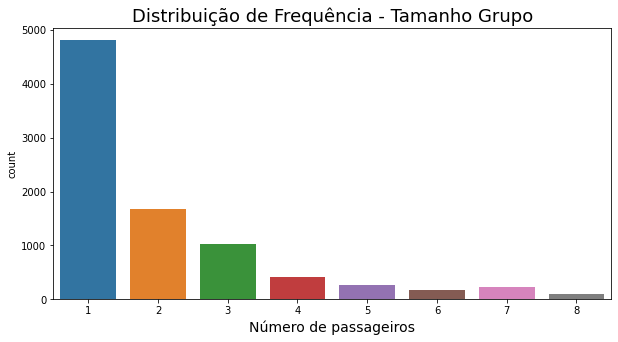

In [ ]:
#Construindo uma visualização da distribuição de frequência das categorias

ax = sns.countplot(dados['Tamanho_Grupo'])

ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição de Frequência - Tamanho Grupo', fontsize = 18)
ax.set_xlabel('Número de passageiros', fontsize = 14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


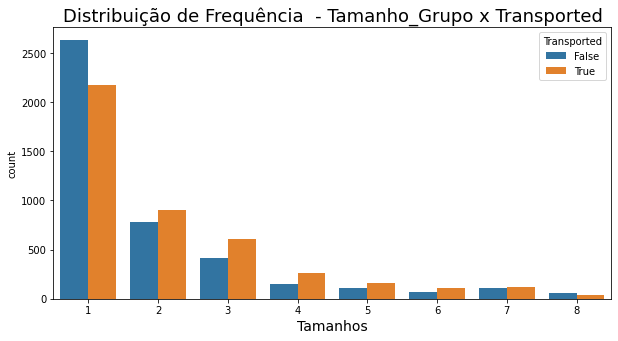

In [ ]:
ax = sns.countplot(dados['Tamanho_Grupo'], hue = dados['Transported'])

ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição de Frequência  - Tamanho_Grupo x Transported', fontsize = 18)
ax.set_xlabel('Tamanhos', fontsize = 14)
ax

In [ ]:

#Importando ferramenta do Sklearn para cálculo do chi2
from sklearn.feature_selection import chi2

#Criando uma cópia do dataset apenas com as duas variáveis
dados_0 = dados[['Tamanho_Grupo', 'Transported']].copy()
#Deletando os registros nulos (Pois a ferramenta retorna erro com valores nulos presentes)
dados_0.dropna(inplace= True)

#Criando as variável X e y para realizar o teste
#Convertendo os dados para valores númericos pois a ferramenta não funciona com o tipo bool
X_0 = dados_0.iloc[:,0]
y_0 = dados_0.iloc[:,-1].map({False: 0, True: 1})

#Convertando o X para array numpy e mudando o shape do container para evitar erros
X_0 = X_0.values
X_0 = X_0.reshape(-1,1)

#ferramenta cálcula um valor de score e um p-value
score_0, p_value_0 = chi2(X_0,y_0)

#Realizando o teste de hipótese.


alpha = 0.05#Nível de singnificância / intervalo de confiaça

hipótese_H0 = 'Hipótese alternativa rejeitada. Não há associação entre as duas variáveis. Sendo assim, estatísticamente não podemos inferir uma relação de dependência.'
hipótese_H1 = 'Hipótese nula rejeitada. Há associação entre as duas variáveis. Sendo assim, estatísticamente podemos inferir uma relação de dependência.'

if alpha > p_value_0:
  print (hipótese_H1)

else:
  print (hipótese_H0)


correlacoes_qualitativas = {'Tamanho_Grupo': score_0}




Hipótese nula rejeitada. Há associação entre as duas variáveis. Sendo assim, estatísticamente podemos inferir uma relação de dependência.


###  <font color=BLACK>HomePlanet</font>

***

**Descrição da variável a partir no dicionário**

***


> HomePlanet- O planeta de onde o passageiro partiu, normalmente seu planeta de residência permanente.

In [ ]:
#Exporando os valores únicos da variável

dados['HomePlanet'].unique()

#Temos terra, marte, europa e nan representam celulas com registro nulo.

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [ ]:
#DISTRIBUIÇÃO DE FREQUÊNCIA DAS CATEGORIAS

frequencia_hp = dados['HomePlanet'].value_counts()
frequencia_hp#Para verificarmos o valor total da frequência das categorias no registro

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [ ]:
percentual_hp = dados['HomePlanet'].value_counts(normalize = True)*100
percentual_hp#Pra verificarmos a percentual dos registros em relação ao valor total de registros

Earth     54.192181
Europa    25.094206
Mars      20.713613
Name: HomePlanet, dtype: float64

In [ ]:
dist_freq_hp = pd.DataFrame(
    {'Frequência': frequencia_hp, 'Porcentagem (%)': percentual_hp}
)



dist_freq_hp.sort_index(ascending = True, inplace = True)
dist_freq_hp.reset_index(inplace=True)
dist_freq_hp.rename({'index': 'Classes'}, axis= 'columns', inplace = True)
dist_freq_hp

,Classes,Frequência,Porcentagem (%)
0,Earth,4602,54.192181
1,Europa,2131,25.094206
2,Mars,1759,20.713613


Aqui temos a noção de que os dados estão desbalanceados num sentido de frequência. Os passageiros da terra representam mais da metade, e as outras duas categoria se alternam entre os registros restantes.

É importante manter a consciência dessa informação para não cometer erros de inferência por questões de proporção das classes.

In [ ]:
#AQUI ESTAREMOS VERIFICANDO A RELAÇÃO DESSE VARIÁVEL COM A VARIÁVEL TRANSPORTED, QUE É NOSSO ALVO NO OBJETIVO FINAL DO PROJETO

frequencia_hp_transported = pd.crosstab(
    
    index = dados['Transported'],
    columns = dados['HomePlanet'],


)


frequencia_hp_transported

HomePlanet,Earth,Europa,Mars
Transported,,,
False,2651,727,839
True,1951,1404,920


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


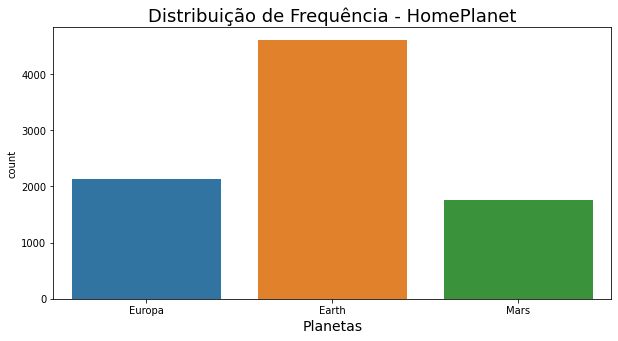

In [ ]:
#Construindo uma visualização da distribuição de frequência das categorias

ax = sns.countplot(dados['HomePlanet'])

ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição de Frequência - HomePlanet', fontsize = 18)
ax.set_xlabel('Planetas', fontsize = 14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


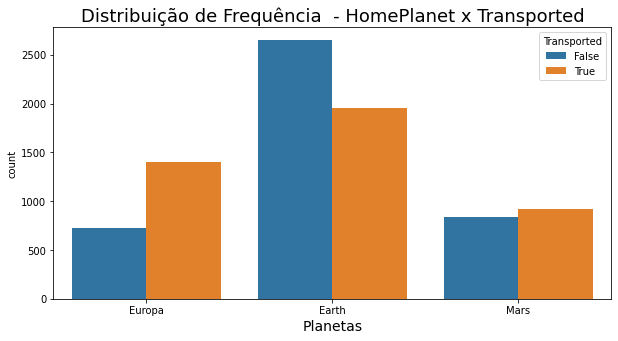

In [ ]:
ax = sns.countplot(dados['HomePlanet'], hue = dados['Transported'])

ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição de Frequência  - HomePlanet x Transported', fontsize = 18)
ax.set_xlabel('Planetas', fontsize = 14)
ax

Podemoes verificar que existe uma variação na proporças da relação da variável HomePlanet com variável alvo. 

Por mais que a terra seja a categoria com o maior número de registros, ela teve a maior parte dos seus registros atribuidos a categoria False, do atributo transported. Em contra partida Europa teve o maior número dos seus registros atribuidos a True, e marte apresentou um certo tipo de equilibrio. Em testes livres, eu já verifiquei que a proporção é equilibrada para True e False em transported sem a plicação de nenhum filtro. Isso levanta a suspeita de que possa haver uma relação de associação entre essas duas variáveis.

Abaixo, estarei realizando o teste do qui-quadrado(de independência) para verificar de maneiras mais técnica essa possível correlação.

Posteriormente para as outras variáveis, também aplicarei o teste de qui-quadrado caso eu julgue necessário e ou vantajoso.

Mais informações sobre a natureza do deste podem ser encontradas em:

> https://pt.wikipedia.org/wiki/Teste_qui-quadrado_de_Pearson

Inforamações sobre a forma de uso do teste em contexto de ciência de dados podem ser encontradas em:

> https://acervolima.com/python-teste-qui-quadrado-de-pearson/

In [ ]:

#Importando ferramenta do Sklearn para cálculo do chi2
from sklearn.feature_selection import chi2

#Criando uma cópia do dataset apenas com as duas variáveis
dados_1 = dados[['HomePlanet', 'Transported']].copy()
#Deletando os registros nulos (Pois a ferramenta retorna erro com valores nulos presentes)
dados_1.dropna(inplace= True)

#Criando as variável X e y para realizar o teste
#Convertendo os dados para valores númericos pois a ferramenta não funciona com o tipo bool
X_1 = dados_1.iloc[:,0].map({'Earth': 0, 'Europa': 1, 'Mars': 3})
y_1 = dados_1.iloc[:,-1].map({False: 0, True: 1})

#Convertando o X para array numpy e mudando o shape do container para evitar erros
X_1 = X_1.values
X_1 = X_1.reshape(-1,1)

#ferramenta cálcula um valor de score e um p-value
score_1, p_value_1 = chi2(X_1,y_1)

#Realizando o teste de hipótese.


alpha_1 = 0.05#Nível de singnificância / intervalo de confiaça

hipótese_H0 = 'Hipótese alternativa rejeitada. Não há associação entre as duas variáveis. Sendo assim, estatísticamente não podemos inferir uma relação de dependência.'
hipótese_H1 = 'Hipótese nula rejeitada. Há associação entre as duas variáveis. Sendo assim, estatísticamente podemos inferir uma relação de dependência.'

if alpha_1 > p_value_1:
  print (hipótese_H1)

else:
  print (hipótese_H0)


correlacoes_qualitativas.update({'HomePlanet': score_1})




Hipótese nula rejeitada. Há associação entre as duas variáveis. Sendo assim, estatísticamente podemos inferir uma relação de dependência.


In [ ]:
correlacoes_qualitativas

{'HomePlanet': array([102.03806828]), 'Tamanho_Grupo': array([74.32206694])}

Por enquanto seguiremos na exploração das demais variáveis. Em outras etapas do Projeto possso vir a fazer novas explorações a respeito do comportamento dessa variável.



#### Observações iniciais

###  <font color=BLACK>CryoSleep</font>

***

**Descrição da variável a partir no dicionário**

***


> CryoSleep - Indica se o passageiro optou por ser colocado em animação suspensa durante a viagem. Os passageiros em sono criogênico estão confinados em suas cabines.

In [ ]:
#Exporando os valores únicos da variável

dados['CryoSleep'].unique()

#Temos valores booleanos onde False representa que o passageiro não optou pelo CryoSono e True representa que o passageiro optou por ser colocado em CryoSono.

array([False, True, nan], dtype=object)

In [ ]:
#DISTRIBUIÇÃO DE FREQUÊNCIA DAS CATEGORIAS

frequencia_cs = dados['CryoSleep'].value_counts()
frequencia_cs#Para verificarmos o valor total da frequência das categorias no registro

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [ ]:
percentual_cs = dados['CryoSleep'].value_counts(normalize = True)*100
percentual_cs#Pra verificarmos a percentual dos registros em relação ao valor total de registros

False    64.16942
True     35.83058
Name: CryoSleep, dtype: float64

In [ ]:
#Construindo um DataFrame com as informações de frequência e percentual
dist_freq_cs = pd.DataFrame(
    {'Frequência': frequencia_cs, 'Porcentagem (%)': percentual_cs}
)



dist_freq_cs.sort_index(ascending = True, inplace = True)
dist_freq_cs.reset_index(inplace=True)
dist_freq_cs.rename({'index': 'Classes'}, axis= 'columns', inplace = True)
dist_freq_cs

,Classes,Frequência,Porcentagem (%)
0,False,5439,64.16942
1,True,3037,35.83058


In [ ]:
#AQUI ESTAREMOS VERIFICANDO A RELAÇÃO DESSE VARIÁVEL COM A VARIÁVEL TRANSPORTED, QUE É NOSSO ALVO NO OBJETIVO FINAL DO PROJETO

frequencia_hp_transported = pd.crosstab(
    
    index = dados['Transported'],
    columns = dados['CryoSleep'],


)


frequencia_hp_transported

CryoSleep,False,True
Transported,,
False,3650,554
True,1789,2483


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


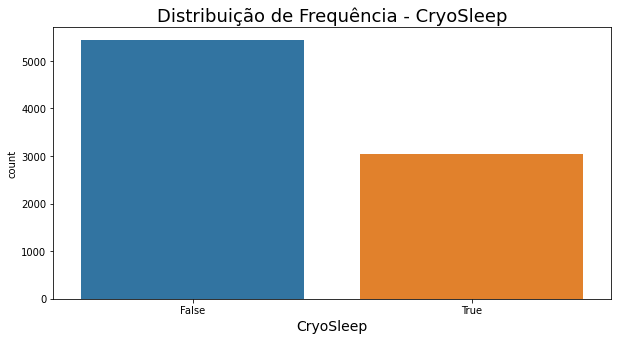

In [ ]:
#Construindo uma visualização da distribuição de frequência das categorias

ax = sns.countplot(dados['CryoSleep'])

ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição de Frequência - CryoSleep', fontsize = 18)
ax.set_xlabel('CryoSleep', fontsize = 14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


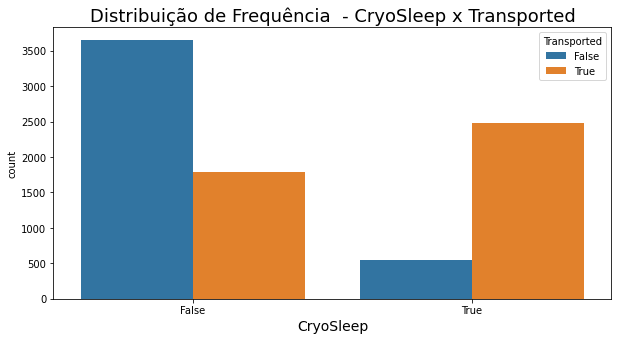

In [ ]:
#AQUI TEMOS UMA VISUALIZAÇÃO DA RELAÇÃO DE ASSOCIAÇÃO ENTRE A VARIÁVEL CRYOSLEEP E A VARIÁVEL ALVO

ax = sns.countplot(dados['CryoSleep'], hue = dados['Transported'])

ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição de Frequência  - CryoSleep x Transported', fontsize = 18)
ax.set_xlabel('CryoSleep', fontsize = 14)
ax

In [ ]:

#Importando ferramenta do Sklearn para cálculo do chi2
from sklearn.feature_selection import chi2

#Criando uma cópia do dataset apenas com as duas variáveis
dados_2 = dados[['CryoSleep', 'Transported']].copy()
#Deletando os registros nulos (Pois a ferramenta retorna erro com valores nulos presentes)
dados_2.dropna(inplace= True)

#Criando as variável X e y para realizar o teste
#Convertendo os dados para valores númericos pois a ferramenta não funciona com o tipo bool
X_2 = dados_2.iloc[:,0].map({False: 0, True: 1})
y_2 = dados_2.iloc[:,-1].map({False: 0, True: 1})

#Convertando o X para array numpy e mudando o shape do container para evitar erros
X_2 = X_2.values
X_2 = X_2.reshape(-1,1)

#ferramenta cálcula um valor de score e um p-value
score_2, p_value_2 = chi2(X_2,y_2)

#Realizando o teste de hipótese.


alpha = 0.05#Nível de singnificância / intervalo de confiaça

hipótese_H0 = 'Hipótese alternativa rejeitada. Não há associação entre as duas variáveis. Sendo assim, estatísticamente não podemos inferir uma relação de dependência.'
hipótese_H1 = 'Hipótese nula rejeitada. Há associação entre as duas variáveis. Sendo assim, estatísticamente podemos inferir uma relação de dependência.'

if alpha > p_value_2:
  print (hipótese_H1)

else:
  print (hipótese_H0)

correlacoes_qualitativas.update({'CryoSleep': score_2})

Hipótese nula rejeitada. Há associação entre as duas variáveis. Sendo assim, estatísticamente podemos inferir uma relação de dependência.


###  <font color=BLACK>Cabin</font>

***

**Descrição da variável a partir no dicionário**

***


> Cabin -  O número da cabine onde o passageiro está hospedado. Toma a forma deck/num/side, *onde side pode ser tanto P para Bombordo como S para Estibordo.

In [ ]:
#Exporando os valores únicos da variável

dados['Cabin'].unique(), dados['Cabin'].value_counts()

#Podemos ver que existem milhbares de categorias.
#Porém ao verificarmos as informações sobre a variável, vemos que é possível gerar novas variáveis qualitativas a partir delas
#Criaremos dias novas variáveis que Serão Deck e Side. Onde deck receberá a letra que representa o Deck e Side recebera S para estibordo e P para bombordo.
#As análises nessa sessão serão feitas à partir dessas novas duas variáveis.

(array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
       dtype=object), G/734/S     8
 G/109/P     7
 B/201/P     7
 G/1368/P    7
 G/981/S     7
            ..
 G/556/P     1
 E/231/S     1
 G/545/S     1
 G/543/S     1
 F/947/P     1
 Name: Cabin, Length: 6560, dtype: int64)

#### Criando as duas outras novas variáveis 

In [ ]:
# Criando a coluna Side com a ultima str do atributo 'Cabin'
dados['Side'] = dados['Cabin'].str.get(-1)


In [ ]:
dados['Side'].value_counts()

S    4288
P    4206
Name: Side, dtype: int64

In [ ]:
#Criando a coluna Deck com a primeira str do atributo 'Cabin'
dados['Deck'] = dados['Cabin'].str.get(0)

In [ ]:
dados['Deck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Deck, dtype: int64

#### Side

In [ ]:
#DISTRIBUIÇÃO DE FREQUÊNCIA DAS CATEGORIAS

frequencia_side = dados['Side'].value_counts()
frequencia_side#Para verificarmos o valor total da frequência das categorias no registro

S    4288
P    4206
Name: Side, dtype: int64

In [ ]:
percentual_side = dados['Side'].value_counts(normalize = True)*100
percentual_side#Pra verificarmos a percentual dos registros em relação ao valor total de registros

S    50.482694
P    49.517306
Name: Side, dtype: float64

In [ ]:
#Construindo um DataFrame com as informações de frequência e percentual
dist_freq_side = pd.DataFrame(
    {'Frequência': frequencia_side, 'Porcentagem (%)': percentual_side}
)



dist_freq_side.sort_index(ascending = True, inplace = True)
dist_freq_side.reset_index(inplace=True)
dist_freq_side.rename({'index': 'Classes'}, axis= 'columns', inplace = True)
dist_freq_side

,Classes,Frequência,Porcentagem (%)
0,P,4206,49.517306
1,S,4288,50.482694


**Aqui podemos verificar que em relação a frequência, há um equilíbrio entre as duas categorias**

In [ ]:
#AQUI ESTAREMOS VERIFICANDO A RELAÇÃO DESSE VARIÁVEL COM A VARIÁVEL TRANSPORTED, QUE É NOSSO ALVO NO OBJETIVO FINAL DO PROJETO

frequencia_side_transported = pd.crosstab(
    
    index = dados['Transported'],
    columns = dados['Side'],


)


frequencia_side_transported

Side,P,S
Transported,,
False,2308,1908
True,1898,2380


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


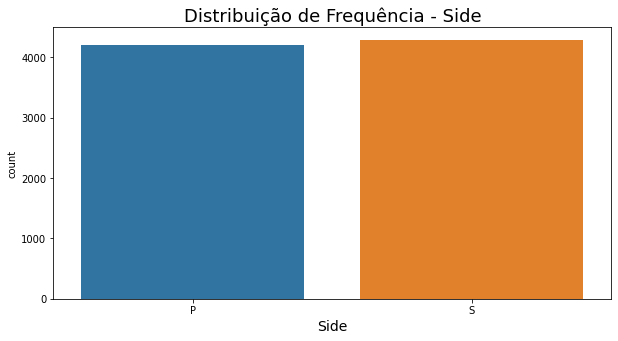

In [ ]:
#Construindo uma visualização da distribuição de frequência das categorias

ax = sns.countplot(dados['Side'])

ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição de Frequência - Side', fontsize = 18)
ax.set_xlabel('Side', fontsize = 14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


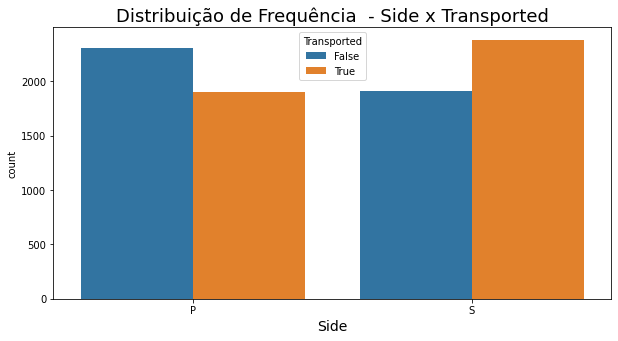

In [ ]:
#AQUI TEMOS UMA VISUALIZAÇÃO DA RELAÇÃO DE ASSOCIAÇÃO ENTRE A VARIÁVEL SIDE E A VARIÁVEL ALVO

ax = sns.countplot(dados['Side'], hue = dados['Transported'])

ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição de Frequência  - Side x Transported', fontsize = 18)
ax.set_xlabel('Side', fontsize = 14)
ax

A priori parece existir uma relação de associação entre a variável side e a variável alvo.

Para as pessoas que estavam a Bombordo na Nave, os não transportados representam maioria.

Para as pessoas que estava a Estibordo da Nave, os Transportados representam maioria.


Estarei abaixo procedendo novamente o teste do qui-quadrado para verificar a relação de associação entre as variáveis.

In [ ]:


#Criando uma cópia do dataset apenas com as duas variáveis
dados_3 = dados[['Side', 'Transported']].copy()
#Deletando os registros nulos (Pois a ferramenta retorna erro com valores nulos presentes)
dados_3.dropna(inplace= True)

#Criando as variável X e y para realizar o teste
#Convertendo os dados para valores númericos pois a ferramenta não funciona com o tipo bool
X_3 = dados_3.iloc[:,0].map({'S': 0, 'P': 1})
y_3 = dados_3.iloc[:,-1].map({False: 0, True: 1})

#Convertando o X para array numpy e mudando o shape do container para evitar erros
X_3 = X_3.values
X_3 = X_3.reshape(-1,1)

#ferramenta cálcula um valor de score e um p-value
score_3, p_value_3 = chi2(X_3,y_3)

#Realizando o teste de hipótese.


alpha = 0.05#Nível de singnificância / intervalo de confiaça

hipótese_H0 = 'Hipótese alternativa rejeitada. Não há associação entre as duas variáveis. Sendo assim, estatísticamente não podemos inferir uma relação de dependência.'
hipótese_H1 = 'Hipótese nula rejeitada. Há associação entre as duas variáveis. Sendo assim, estatísticamente podemos inferir uma relação de dependência.'

if alpha > p_value_3:
  print (hipótese_H1)

else:
  print (hipótese_H0)


correlacoes_qualitativas.update({'Side': score_3})

Hipótese nula rejeitada. Há associação entre as duas variáveis. Sendo assim, estatísticamente podemos inferir uma relação de dependência.


In [ ]:
correlacoes_qualitativas

{'CryoSleep': array([1194.55672227]),
 'HomePlanet': array([102.03806828]),
 'Side': array([46.17866897]),
 'Tamanho_Grupo': array([74.32206694])}

#### Deck

In [ ]:
#DISTRIBUIÇÃO DE FREQUÊNCiaA DAS CATEGORIAS

frequencia_deck = dados['Deck'].value_counts()
frequencia_deck#Para verificarmos o valor total da frequência das categorias no registro

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Deck, dtype: int64

In [ ]:
percentual_deck = dados['Deck'].value_counts(normalize = True)*100
percentual_deck#Pra verificarmos a percentual dos registros em relação ao valor total de registros

F    32.893807
G    30.127149
E    10.313162
B     9.171180
C     8.794443
D     5.627502
A     3.013892
T     0.058865
Name: Deck, dtype: float64

In [ ]:
#Construindo um DataFrame com as informações de frequência e percentual
dist_freq_deck = pd.DataFrame(
    {'Frequência': frequencia_deck, 'Porcentagem (%)': percentual_deck}
)



dist_freq_deck.sort_index(ascending = True, inplace = True)
dist_freq_deck.reset_index(inplace=True)
dist_freq_deck.rename({'index': 'Classes'}, axis= 'columns', inplace = True)
dist_freq_deck

,Classes,Frequência,Porcentagem (%)
0,A,256,3.013892
1,B,779,9.171180
2,C,747,8.794443
3,D,478,5.627502
4,E,876,10.313162
5,F,2794,32.893807
6,G,2559,30.127149
7,T,5,0.058865


**Aqui podemos verificar que dois Decks continham grande parte dos passageiros, e o restante se dividia nos demais. A primeira vista essa proporçaão me parece semelhante a proporção de CryoSlep em False e True. Posteriormente estarei atento a esse detalhe para verificar uma possível relação entre essas duas variáveis.**

In [ ]:
#AQUI ESTAREMOS VERIFICANDO A RELAÇÃO DESSE VARIÁVEL COM A VARIÁVEL TRANSPORTED, QUE É NOSSO ALVO NO OBJETIVO FINAL DO PROJETO

frequencia_side_transported = pd.crosstab(
    
    index = dados['Transported'],
    columns = dados['Deck'],


)


frequencia_side_transported

Deck,A,B,C,D,E,F,G,T
Transported,,,,,,,,
False,129,207,239,271,563,1565,1238,4
True,127,572,508,207,313,1229,1321,1


Aqui podemos verificar que em em alguns decks uma maioria dos passageiros apresenta associação com a variável True e em outros há uma associação maior com o False e alguns apresentam uma relação mais equilibrada.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


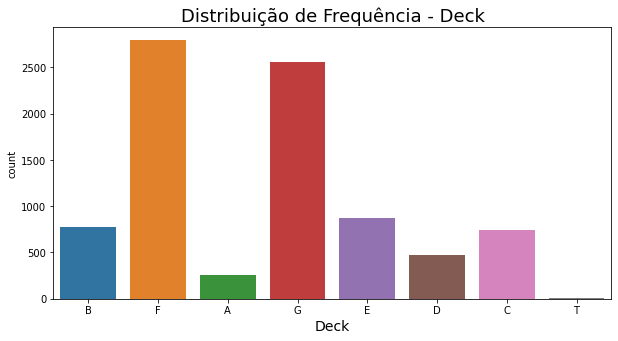

In [ ]:
#Construindo uma visualização da distribuição de frequência das categorias

ax = sns.countplot(dados['Deck'])

ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição de Frequência - Deck', fontsize = 18)
ax.set_xlabel('Deck', fontsize = 14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


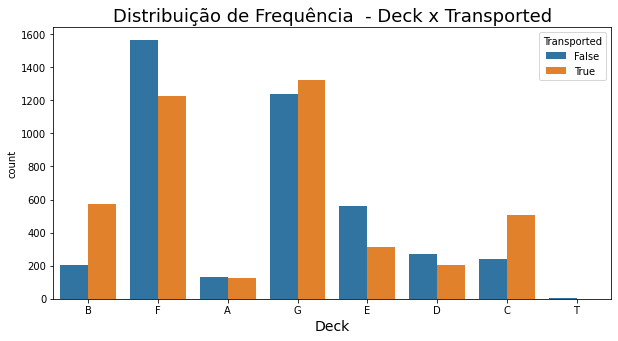

In [ ]:
#AQUI TEMOS UMA VISUALIZAÇÃO DA RELAÇÃO DE ASSOCIAÇÃO ENTRE A VARIÁVEL DECK E A VARIÁVEL ALVO

ax = sns.countplot(dados['Deck'], hue = dados['Transported'])

ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição de Frequência  - Deck x Transported', fontsize = 18)
ax.set_xlabel('Deck', fontsize = 14)
ax

A priori parece existir uma relação de associação entre a variável Deck e a variável alvo.



Estarei abaixo procedendo novamente o teste do qui-quadrado para verificar a relação de associação entre as variáveis.

In [ ]:
#Criando um dicionário para converter os valores para númericos
labels = {'A': 1, 'B': 2, 'C':3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}


#Criando uma cópia do dataset apenas com as duas variáveis
dados_4 = dados[['Deck', 'Transported']].copy()
#Deletando os registros nulos (Pois a ferramenta retorna erro com valores nulos presentes)
dados_4.dropna(inplace= True)

#Criando as variável X e y para realizar o teste
#Convertendo os dados para valores númericos pois a ferramenta não funciona com o tipo bool
X_4 = dados_4.iloc[:,0].map(labels)
y_4 = dados_4.iloc[:,-1].map({False: 0, True: 1})

#Convertando o X para array numpy e mudando o shape do container para evitar erros
X_4 = X_4.values
X_4 = X_4.reshape(-1,1)

#ferramenta cálcula um valor de score e um p-value
score_4, p_value_4 = chi2(X_4,y_4)

#Realizando o teste de hipótese.


alpha = 0.05#Nível de singnificância / intervalo de confiaça

hipótese_H0 = 'Hipótese alternativa rejeitada. Não há associação entre as duas variáveis. Sendo assim, estatísticamente não podemos inferir uma relação de dependência.'
hipótese_H1 = 'Hipótese nula rejeitada. Há associação entre as duas variáveis. Sendo assim, estatísticamente podemos inferir uma relação de dependência.'

if alpha > p_value_4:
  print (hipótese_H1)

else:
  print (hipótese_H0)


correlacoes_qualitativas.update({'Deck': score_4})



Hipótese nula rejeitada. Há associação entre as duas variáveis. Sendo assim, estatísticamente podemos inferir uma relação de dependência.


In [ ]:

correlacoes_qualitativas

{'CryoSleep': array([1194.55672227]),
 'Deck': array([68.65823588]),
 'HomePlanet': array([102.03806828]),
 'Side': array([46.17866897]),
 'Tamanho_Grupo': array([74.32206694])}

###  <font color=BLACK>Destination</font>

***

**Descrição da variável a partir no dicionário**

***


> Destination- O planeta para o qual o passageiro irá desembarcar.

In [ ]:
#DISTRIBUIÇÃO DE FREQUÊNCIA DAS CATEGORIAS

frequencia_destination = dados['Destination'].value_counts()
frequencia_destination#Para verificarmos o valor total da frequência das categorias no registro

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [ ]:
percentual_destination = dados['Destination'].value_counts(normalize = True)*100
percentual_destination#Pra verificarmos a percentual dos registros em relação ao valor total de registros

TRAPPIST-1e      69.498296
55 Cancri e      21.149101
PSO J318.5-22     9.352603
Name: Destination, dtype: float64

In [ ]:
#Construindo um DataFrame com as informações de frequência e percentual
dist_freq_dest = pd.DataFrame(
    {'Frequência': frequencia_destination, 'Porcentagem (%)': percentual_destination}
)



dist_freq_dest.sort_index(ascending = True, inplace = True)
dist_freq_dest.reset_index(inplace=True)
dist_freq_dest.rename({'index': 'Classes'}, axis= 'columns', inplace = True)
dist_freq_dest

,Classes,Frequência,Porcentagem (%)
0,55 Cancri e,1800,21.149101
1,PSO J318.5-22,796,9.352603
2,TRAPPIST-1e,5915,69.498296


**Aqui podemos verificar que a maior parte dos passageiros tinham como destino TRAPPIST-1e, seguido de 55 Cancri-e e por último PSo J318.5-22.**

In [ ]:
#AQUI ESTAREMOS VERIFICANDO A RELAÇÃO DESSE VARIÁVEL COM A VARIÁVEL TRANSPORTED, QUE É NOSSO ALVO NO OBJETIVO FINAL DO PROJETO

frequencia_destination_transported = pd.crosstab(
    
    index = dados['Transported'],
    columns = dados['Destination'],


)


frequencia_destination_transported

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
Transported,,,
False,702,395,3128
True,1098,401,2787


Para 55 Cancri e - Temos uma maioria númerica associada com a categoria True.

Para PSO J318.5-22 - Parece haver uma relação de equilíbrio entre as duas categorias.

Para 	TRAPPIST-1e - Temos uma maioria númerica associada a variável False,




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


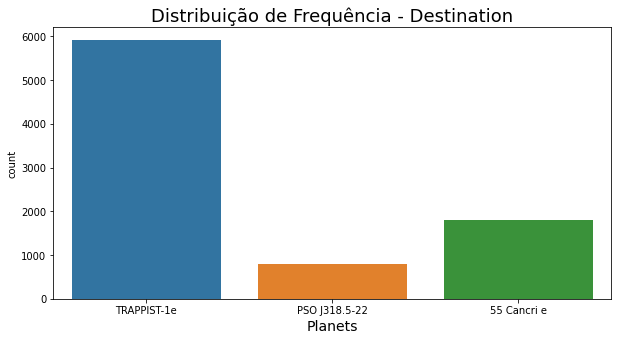

In [ ]:
#Construindo uma visualização da distribuição de frequência das categorias

ax = sns.countplot(dados['Destination'])

ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição de Frequência - Destination', fontsize = 18)
ax.set_xlabel('Planets', fontsize = 14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


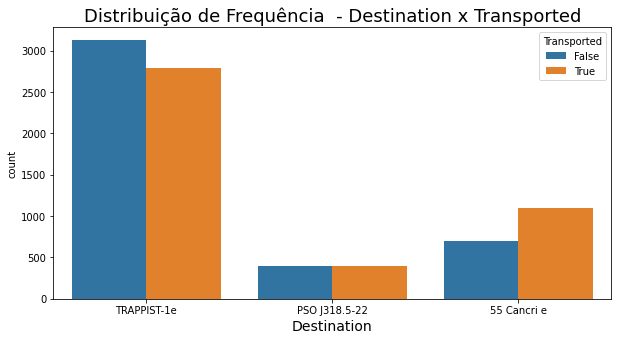

In [ ]:
#AQUI TEMOS UMA VISUALIZAÇÃO DA RELAÇÃO DE ASSOCIAÇÃO ENTRE A VARIÁVEL DESTINATION E A VARIÁVEL ALVO

ax = sns.countplot(dados['Destination'], hue = dados['Transported'])

ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição de Frequência  - Destination x Transported', fontsize = 18)
ax.set_xlabel('Destination', fontsize = 14)
ax

**Visualmente não parece haver uma relação de dependência muito significativa entre as variáveis. Vejamos o resultado do teste abaixo.**

In [ ]:



#Criando uma cópia do dataset apenas com as duas variáveis
dados_5 = dados[['Destination', 'Transported']].copy()
#Deletando os registros nulos (Pois a ferramenta retorna erro com valores nulos presentes)
dados_5.dropna(inplace= True)

#Criando as variável X e y para realizar o teste
#Convertendo os dados para valores númericos pois a ferramenta não funciona com o tipo bool
X_5 = dados_5.iloc[:,0].map({'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2  })
y_5 = dados_5.iloc[:,-1].map({False: 0, True: 1})

#Convertando o X para array numpy e mudando o shape do container para evitar erros
X_5 = X_5.values
X_5 = X_5.reshape(-1,1)

#ferramenta cálcula um valor de score e um p-value
score_5, p_value_5 = chi2(X_5,y_5)

#Realizando o teste de hipótese.


alpha = 0.05#Nível de singnificância / intervalo de confiaça

hipótese_H0 = 'Hipótese alternativa rejeitada. Não há associação entre as duas variáveis. Sendo assim, estatísticamente não podemos inferir uma relação de dependência.'
hipótese_H1 = 'Hipótese nula rejeitada. Há associação entre as duas variáveis. Sendo assim, estatísticamente podemos inferir uma relação de dependência.'

if alpha > p_value_5:
  print (hipótese_H1)

else:
  print (hipótese_H0)


correlacoes_qualitativas.update({'Destination': score_5})


Hipótese nula rejeitada. Há associação entre as duas variáveis. Sendo assim, estatísticamente podemos inferir uma relação de dependência.


In [ ]:
correlacoes_qualitativas

{'CryoSleep': array([1194.55672227]),
 'Deck': array([68.65823588]),
 'Destination': array([133.65371114]),
 'HomePlanet': array([102.03806828]),
 'Side': array([46.17866897]),
 'Tamanho_Grupo': array([74.32206694])}

###  <font color=BLACK>Vip</font>

***

**Descrição da variável a partir no dicionário**

***


> VIP - Se o passageiro pagou pelo serviço VIP especial durante a viagem.

In [ ]:
#DISTRIBUIÇÃO DE FREQUÊNCIA DAS CATEGORIAS

frequencia_vip = dados['VIP'].value_counts()
frequencia_vip#Para verificarmos o valor total da frequência das categorias no registro
#Aqui já podemos verificar que Uma grande maior parte dos registros estão na categoria False.

False    8291
True      199
Name: VIP, dtype: int64

In [ ]:
percentual_vip = dados['VIP'].value_counts(normalize = True)*100
percentual_vip#Pra verificarmos a percentual dos registros em relação ao valor total de registros

False    97.656066
True      2.343934
Name: VIP, dtype: float64

In [ ]:
#Construindo um DataFrame com as informações de frequência e percentual
dist_freq_vip = pd.DataFrame(
    {'Frequência': frequencia_vip, 'Porcentagem (%)': percentual_vip}
)



dist_freq_vip.sort_index(ascending = True, inplace = True)
dist_freq_vip.reset_index(inplace=True)
dist_freq_vip.rename({'index': 'Classes'}, axis= 'columns', inplace = True)
dist_freq_vip

,Classes,Frequência,Porcentagem (%)
0,False,8291,97.656066
1,True,199,2.343934


In [ ]:
#AQUI ESTAREMOS VERIFICANDO A RELAÇÃO DESSE VARIÁVEL COM A VARIÁVEL TRANSPORTED, QUE É NOSSO ALVO NO OBJETIVO FINAL DO PROJETO

frequencia_destination_vip = pd.crosstab(
    
    index = dados['Transported'],
    columns = dados['VIP'],


)


frequencia_destination_vip

VIP,False,True
Transported,,
False,4093,123
True,4198,76


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


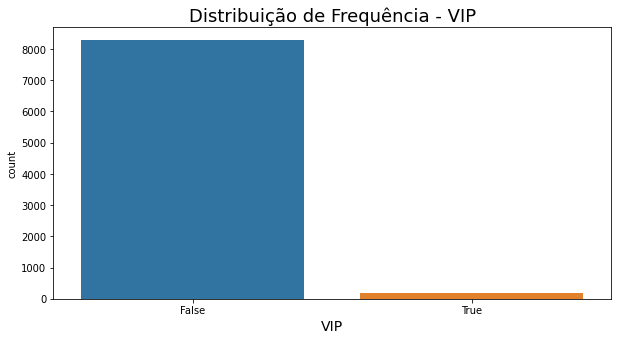

In [ ]:
#Construindo uma visualização da distribuição de frequência das categorias

ax = sns.countplot(dados['VIP'])

ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição de Frequência - VIP', fontsize = 18)
ax.set_xlabel('VIP', fontsize = 14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


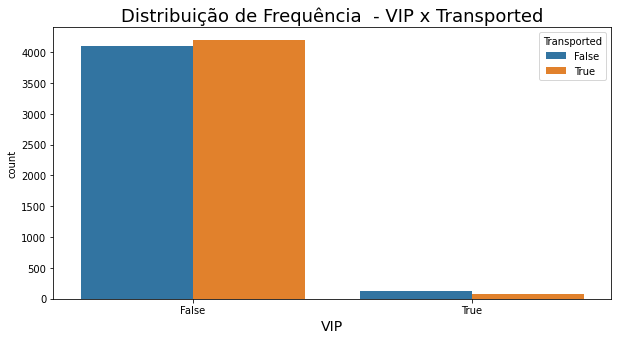

In [ ]:
#AQUI TEMOS UMA VISUALIZAÇÃO DA RELAÇÃO DE ASSOCIAÇÃO ENTRE A VARIÁVEL DESTINATION E A VARIÁVEL ALVO

ax = sns.countplot(dados['VIP'], hue = dados['Transported'])

ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição de Frequência  - VIP x Transported', fontsize = 18)
ax.set_xlabel('VIP', fontsize = 14)
ax

**Visualmente não parece haver uma relação de dependência muito significativa entre as variáveis. Vejamos o resultado do teste abaixo.**

In [ ]:




#Criando uma cópia do dataset apenas com as duas variáveis
dados_6 = dados[['VIP', 'Transported']].copy()
#Deletando os registros nulos (Pois a ferramenta retorna erro com valores nulos presentes)
dados_6.dropna(inplace= True)

#Criando as variável X e y para realizar o teste
#Convertendo os dados para valores númericos pois a ferramenta não funciona com o tipo bool
X_6 = dados_6.iloc[:,0].map({False: 0, True: 1})
y_6 = dados_6.iloc[:,-1].map({False: 0, True: 1})

#Convertando o X para array numpy e mudando o shape do container para evitar erros
X_6 = X_6.values
X_6 = X_6.reshape(-1,1)

#ferramenta cálcula um valor de score e um p-value
score_6, p_value_6 = chi2(X_6,y_6)

#Realizando o teste de hipótese.


alpha = 0.05#Nível de singnificância / intervalo de confiaça

hipótese_H0 = 'Hipótese alternativa rejeitada. Não há associação entre as duas variáveis. Sendo assim, estatísticamente não podemos inferir uma relação de dependência.'
hipótese_H1 = 'Hipótese nula rejeitada. Há associação entre as duas variáveis. Sendo assim, estatísticamente podemos inferir uma relação de dependência.'

if alpha > p_value_6:
  print (hipótese_H1)

else:
  print (hipótese_H0)

correlacoes_qualitativas.update({'VIP': score_6})

Hipótese nula rejeitada. Há associação entre as duas variáveis. Sendo assim, estatísticamente podemos inferir uma relação de dependência.


In [ ]:
correlacoes_qualitativas

{'CryoSleep': array([1194.55672227]),
 'Deck': array([68.65823588]),
 'Destination': array([133.65371114]),
 'HomePlanet': array([102.03806828]),
 'Side': array([46.17866897]),
 'Tamanho_Grupo': array([74.32206694]),
 'VIP': array([11.75250565])}

###  <font color=BLACK>Name</font>

***

**Descrição da variável a partir no dicionário**

***


> Name- O nome e sobrenome do passageiro.

In [ ]:
dados['Name'], dados['Name'].value_counts()

(0         Maham Ofracculy
 1            Juanna Vines
 2           Altark Susent
 3            Solam Susent
 4       Willy Santantines
               ...        
 8688    Gravior Noxnuther
 8689      Kurta Mondalley
 8690         Fayey Connon
 8691     Celeon Hontichre
 8692     Propsh Hontichre
 Name: Name, Length: 8693, dtype: object, Gollux Reedall        2
 Elaney Webstephrey    2
 Grake Porki           2
 Sus Coolez            2
 Apix Wala             2
                      ..
 Jamela Griffy         1
 Hardy Griffy          1
 Salley Mckinn         1
 Mall Frasp            1
 Propsh Hontichre      1
 Name: Name, Length: 8473, dtype: int64)

Aqui temos o nome do passageiro. Conforme vemos nas duas Series acima, diz respeito obviamente o nome do passageiro, porém temos já duas informações que serão úteis no trabalho de exploração dessas variáveis.


1. Os nomes são sempre organizados em nome e sobrebonome.


2. Existem valores duplicados. Tanto no aspecto do nome, quanto do sobrenome. 


Para extrair algo dessa variável e para que ela não tenha apenas fins de chave primária e indexação, estarei criando uma nova variável qualitativa onde cada passagero recebera no formato de string  seu sobrenome. Isso nos ajudará a categorizar nosso DataSet em grupos familiares. 

Obs: Geralmente esse tipo de trabaho é feito em etapas de tratamento de dados e feature engineer, porém será feito agora para que possamos extrair algumas informações da relação dessas categorias com a variável alvo, e posteirirmente investigar possível relação com novas variáveis.


In [ ]:
dados_nome_2 = dados['Name'].str.split(' ', expand = True)
#A partir da variável Name eu crio um novo dataframe com duas colunas, uma para nome e uma para sobrenome.




dados['Sobrenome'] = dados_nome_2.iloc[:, -1]
#Aqui eu crio a variável sobrenome no dataframe do projeto com a coluna de sobrenome do DataFrame criando.


dados


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Id_Grupo,Tamanho_Grupo,Side,Deck,Sobrenome
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,P,B,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,S,F,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,S,A,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,S,A,Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,S,F,Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,1,P,A,Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,1,S,G,Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,1,S,G,Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,2,S,E,Hontichre


In [ ]:
dados['Sobrenome'].value_counts() 

#A partir daqui vemos que reduzimos a variável name para uma nova variável com bem menos categorias.


Casonston     18
Oneiles       16
Domington     15
Litthews      15
Browlerson    14
              ..
Covale         1
Dun            1
Witalnerod     1
Deryplinet     1
Sionerorly     1
Name: Sobrenome, Length: 2217, dtype: int64

In [ ]:
(dados['Sobrenome'].value_counts() > 1).sum()

#Aqui retiramos pessoas que não compartilhavam o mesmo sobrenome e somamos o valor




1835

In [ ]:
#Como ainda existem milhares de valores unicos, separei aqui uma amostra com as 10 familias mais numerosas na nave.
list(dados['Sobrenome'].value_counts()[:10].index)

['Casonston',
 'Oneiles',
 'Domington',
 'Litthews',
 'Browlerson',
 'Garnes',
 'Cartez',
 'Fulloydez',
 'Hinglendez',
 'Distured']

In [ ]:
dados_amostra_sobrenome = dados[dados['Sobrenome'].isin(list(dados['Sobrenome'].value_counts()[:10].index))]
dados_amostra_sobrenome

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Id_Grupo,Tamanho_Grupo,Side,Deck,Sobrenome
183,0205_01,Earth,False,G/34/S,TRAPPIST-1e,29.0,False,0.0,2.0,66.0,0.0,705.0,Carma Oneiles,False,0205,1,S,G,Oneiles
193,0216_01,Earth,False,F/40/S,55 Cancri e,21.0,False,0.0,56.0,0.0,0.0,1918.0,Searla Garnes,False,0216,1,S,F,Garnes
398,0437_01,Earth,False,F/78/S,TRAPPIST-1e,39.0,False,382.0,0.0,22.0,467.0,0.0,Lynnee Oneiles,False,0437,2,S,F,Oneiles
399,0437_02,Earth,False,F/78/S,PSO J318.5-22,40.0,False,7.0,0.0,840.0,26.0,0.0,Debora Oneiles,False,0437,2,S,F,Oneiles
647,0680_01,Earth,True,G/105/P,PSO J318.5-22,45.0,False,0.0,0.0,0.0,0.0,0.0,Garyan Garnes,False,0680,3,P,G,Garnes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8647,9227_01,Earth,True,G/1498/P,TRAPPIST-1e,7.0,False,0.0,0.0,0.0,0.0,0.0,Glendy Hinglendez,False,9227,5,P,G,Hinglendez
8648,9227_02,Earth,True,G/1498/P,PSO J318.5-22,11.0,False,0.0,0.0,0.0,0.0,0.0,Jorgie Hinglendez,True,9227,5,P,G,Hinglendez
8649,9227_03,Earth,True,G/1498/P,PSO J318.5-22,1.0,False,0.0,0.0,0.0,0.0,0.0,Paulas Hinglendez,True,9227,5,P,G,Hinglendez
8650,9227_04,Earth,True,G/1498/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Robyny Hinglendez,True,9227,5,P,G,Hinglendez


In [ ]:
#DISTRIBUIÇÃO DE FREQUÊNCIA DAS CATEGORIAS

frequencia_sobrenome = dados_amostra_sobrenome['Sobrenome'].value_counts()
frequencia_sobrenome#Para verificarmos o valor total da frequência das categorias no registro

Casonston     18
Oneiles       16
Litthews      15
Domington     15
Garnes        14
Fulloydez     14
Browlerson    14
Cartez        14
Distured      13
Hinglendez    13
Name: Sobrenome, dtype: int64

In [ ]:
percentual_sobrenome = dados_amostra_sobrenome['Sobrenome'].value_counts(normalize = True)*100
percentual_sobrenome#Pra verificarmos a percentual dos registros em relação ao valor total de registros

Casonston     12.328767
Oneiles       10.958904
Litthews      10.273973
Domington     10.273973
Garnes         9.589041
Fulloydez      9.589041
Browlerson     9.589041
Cartez         9.589041
Distured       8.904110
Hinglendez     8.904110
Name: Sobrenome, dtype: float64

In [ ]:
#Construindo um DataFrame com as informações de frequência e percentual
dist_freq_sobrenome = pd.DataFrame(
    {'Frequência': frequencia_sobrenome, 'Porcentagem (%)': percentual_sobrenome}
)



dist_freq_sobrenome.sort_index(ascending = True, inplace = True)
dist_freq_sobrenome.reset_index(inplace=True)
dist_freq_sobrenome.rename({'index': 'Classes'}, axis= 'columns', inplace = True)
dist_freq_sobrenome

,Classes,Frequência,Porcentagem (%)
0,Browlerson,14,9.589041
1,Cartez,14,9.589041
2,Casonston,18,12.328767
3,Distured,13,8.904110
4,Domington,15,10.273973
5,Fulloydez,14,9.589041
6,Garnes,14,9.589041
7,Hinglendez,13,8.904110
8,Litthews,15,10.273973
9,Oneiles,16,10.958904


In [ ]:
#AQUI ESTAREMOS VERIFICANDO A RELAÇÃO DESSE VARIÁVEL COM A VARIÁVEL TRANSPORTED, QUE É NOSSO ALVO NO OBJETIVO FINAL DO PROJETO

frequencia_sobrenome_transported = pd.crosstab(
    
    index = dados_amostra_sobrenome['Transported'],
    columns = dados_amostra_sobrenome['Sobrenome'],


)


frequencia_sobrenome_transported

Sobrenome,Browlerson,Cartez,Casonston,Distured,Domington,Fulloydez,Garnes,Hinglendez,Litthews,Oneiles
Transported,,,,,,,,,,
False,5,7,11,7,1,8,9,5,11,10
True,9,7,7,6,14,6,5,8,4,6


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


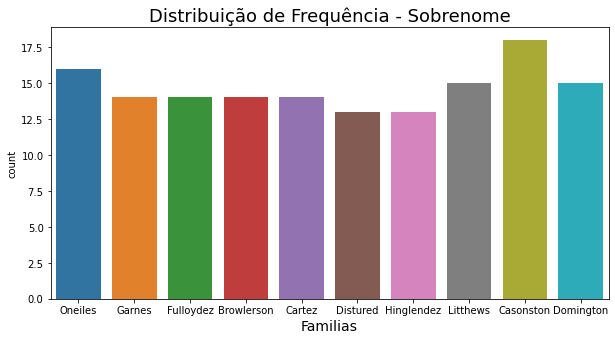

In [ ]:
#Construindo uma visualização da distribuição de frequência das categorias

ax = sns.countplot(dados_amostra_sobrenome['Sobrenome'])

ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição de Frequência - Sobrenome', fontsize = 18)
ax.set_xlabel('Familias', fontsize = 14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


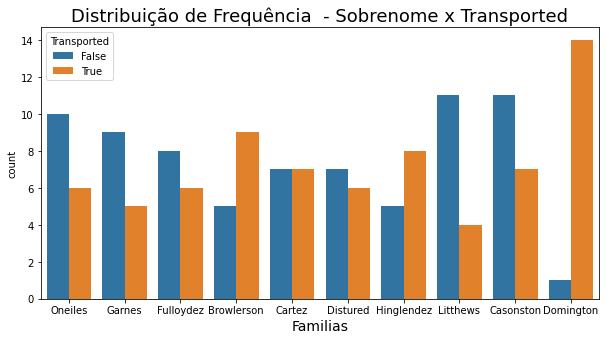

In [ ]:
#AQUI TEMOS UMA VISUALIZAÇÃO DA RELAÇÃO DE ASSOCIAÇÃO ENTRE A VARIÁVEL SOBRENOME E A VARIÁVEL ALVO NA AMOSTRA

ax = sns.countplot(dados_amostra_sobrenome['Sobrenome'], hue = dados_amostra_sobrenome['Transported'])

ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição de Frequência  - Sobrenome x Transported', fontsize = 18)
ax.set_xlabel('Familias', fontsize = 14)
ax

**Eu acredito que a categoria de uma respectiva familia não tenha diretamente associação com a variável tranported. Pois Podemos ver acima que a uma variabilidade no nível de associação de família para família. Acredito que a variável tenha uma relação maior na verdade com as outras, tais como Side, Destination, Deck, CryoSleep e Homeplanet. Isso será testado posteriormente no futuro.**


Como muitos valores nessa variável não atendem o critério de valor de frequência esperada de 5, não estarei realizando o teste de qui-quadrado.

###  <font color=BLACK>Considerações</font>

Foram feitos tarafas básicas no que diz respeito a análise exploratória e descritiva de variáveis qualitativas.

Foram explorados atráves de tabulações e gráficos a distribuição de frequência das categorias presentes nas variáveis e sua relação com a variável alvo.

Foi realziado o teste de dependência de qui-quadrado para verificar a associação entre as variáveis qualitativas e a variável alvo.

Lembrando que **CORRELAÇÃO** não é o mesmo que **CAUSALIDADE**. A associação de algumas variáveis com a variável alvo, podem ter mais relação com sua associação com outras variáveis, do que sua própria associação.

Posteriormente as variáveis serão novamente exploradas para diversos fins, principlamente para o trabalho de preenchimento de dados nulos.


Agora seguiremos com o EDA das variáveis quantitativas do DataSet.

In [ ]:
correlacoes_df = pd.DataFrame(columns =  ['Variáveis', 'Score - Chi-2' ])

correlacoes_df['Variáveis'] = correlacoes_qualitativas.keys()
correlacoes_df['Score - Chi-2'] = correlacoes_qualitativas.values()
correlacoes_df['Score - Chi-2'] = correlacoes_df['Score - Chi-2'].astype('float64')
correlacoes_df.sort_values('Score - Chi-2', inplace=True, ascending=False)

correlacoes_df

,Variáveis,Score - Chi-2
2,CryoSleep,1194.556722
5,Destination,133.653711
1,HomePlanet,102.038068
0,Tamanho_Grupo,74.322067
4,Deck,68.658236
3,Side,46.178669
6,VIP,11.752506


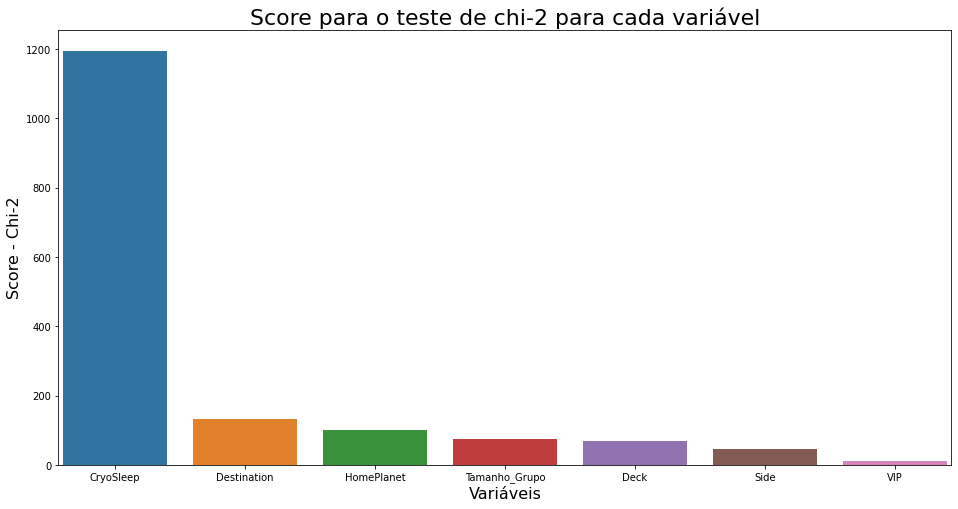

In [ ]:
plt.figure(figsize=(16,8),)
plt.ylabel('Variáveis', fontsize=16)
plt.xlabel('Score - Chi-2', fontsize=16)
plt.title('Score para o teste de chi-2 para cada variável', fontsize=22)
sns.barplot(x= correlacoes_df['Variáveis'], y = correlacoes_df['Score - Chi-2'])
plt.margins(x=0.005)
plt.show()

In [ ]:
correlacoes_df['Score - Chi-2'].astype('float64')

2    1194.556722
5     133.653711
1     102.038068
0      74.322067
4      68.658236
3      46.178669
6      11.752506
Name: Score - Chi-2, dtype: float64

**Aqui podemos ver que dentre as variáveis qualitativas que foram analisadas, CryoSleep é a que provavelmente tem mais correlação com a variável Transported e hipoteticamente é a que mais vai influenciar no modelo. Isso me disperta um alerta para que sejam realizados os esforços adequados para que os valores nulos dessa variável sejam preenchidos adequadamente para que possamos extrair o máximo dela atráves dos modelos de classificação.**

##  <font color=BLACK>EDA variáveis quantitativas.</font>

In [ ]:
for index, valor in enumerate(nomes_variaveis_quantitativas):
  print (f'{index + 1}° - {valor};')
  print()

1° - Age;

2° - RoomService;

3° - FoodCourt;

4° - ShoppingMall;

5° - Spa;

6° - VRDeck;



###  <font color=BLACK>Age</font>

***

**Descrição da variável a partir no dicionário**

***


> **Age- A idade do passageiro.**

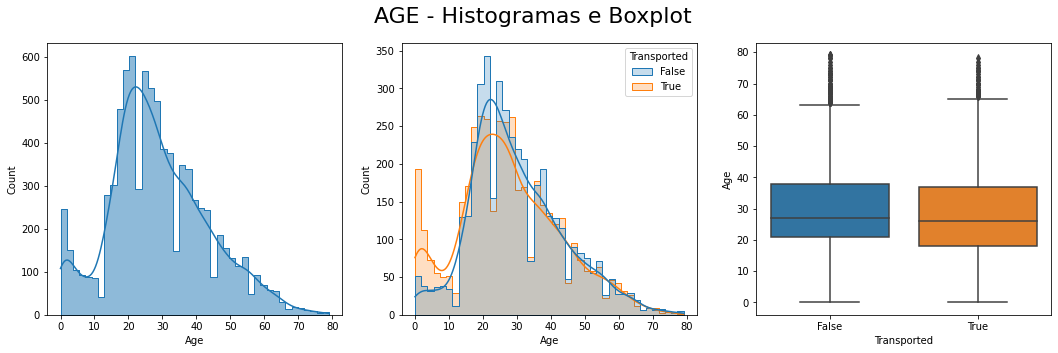

In [ ]:
#Algumas visualizações que me permitem ver a distribuição de frequência da variável, a dispersão dos dados e sua relação com a variável alvo.

fig,ax = plt.subplots(1, 3, figsize=(18,5))
fig.suptitle('AGE - Histogramas e Boxplot', size=22)

sns.histplot(dados['Age'], kde=True, element='step', ax=ax[0])
sns.histplot(x = 'Age', hue = 'Transported', data = dados, kde=True, element='step', ax=ax[1])
sns.boxplot(x='Transported', y='Age', data=dados,  ax=ax[2])

plt.show()

**Aqui estarei aplicando um teste de normalidade a variável para podermos verificar se os dados se encaixam nos parâmetros de uma distribuição normal.**

**Isso pode ser útil, pois no momento da modelagem talvez precisemos transformar os dados usando ferramentas de scala para que sua distribuição fique mais normalizada.**

Mais informações sobre o teste que será utilizado aqui podem ser encontradas em:

>  https://dev4lab.github.io/posts/teste-normalidade/

> https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html


In [ ]:

from scipy.stats import normaltest


k2, p = normaltest(dados['Age'], nan_policy='omit')
k2, p

Hipotese_nula = 'Os dados seguem distribuição normal.'
Hipotese_alternativa = 'Os dados não seguem distribuição normal.'

if p < alpha:
    print(f'A Hipótese Nula pode ser rejeitada.\n\n{Hipotese_alternativa}')
else:
    print(f'A hipótese nula não pode ser rejeitada. \n\n{Hipotese_nula}')

A Hipótese Nula pode ser rejeitada.

Os dados não seguem distribuição normal.


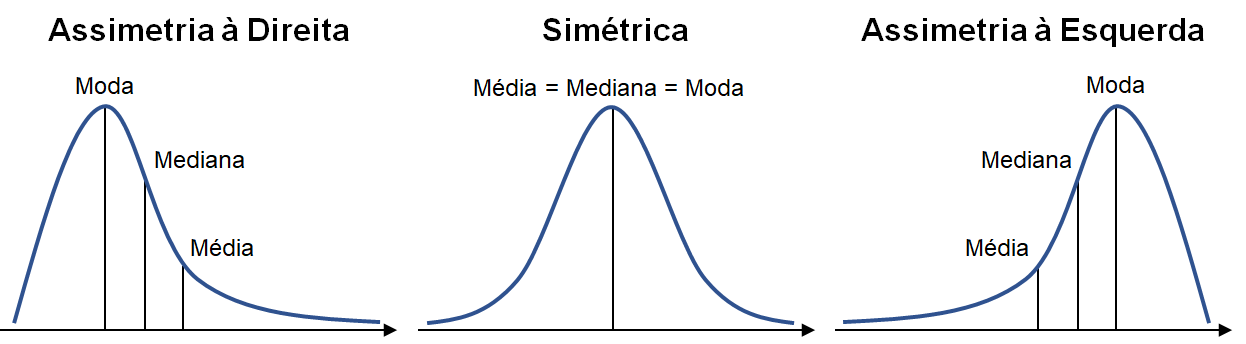

In [ ]:
# Aqui vemos os valores de medidas de tendência central da variável.

dados['Age'].mean(), dados['Age'].median(), dados['Age'].mode()




(28.82793046746535, 27.0, 0    24.0
 dtype: float64)

**Pelo teste de normalidade, a similaridade visual e a tendência de media > mediana > moda é possível presumir que nossa variável apresente características de uma distribuição assímétrica à direita.**

**Acredito que uma possível explicação para isso possa ser o fato de que viagens espaciais serem jornadas longas. Talvez faça mais sentido nessa realidade hipotética que uma maior parte dos passegeiros da nave fosse composta por indivíduos mais jovens porque para eles haveria mais sentido em explorar essa jornada.**

**Agora, abaixo vou proceder com um teste que avalia a correlação entre uma variável quantitativa e uma qualitativa. Para os objetivos desse projeto, eu escolhi é o coeficiente de correlação ponto-bisseral.

Mais informações sobre o teste podem ser encontradas em:

> https://towardsdatascience.com/point-biserial-correlation-with-python-f7cd591bd3b1

> https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pointbiserialr.html#scipy.stats.pointbiserialr


In [ ]:
#Criando uma cópia do dataset apenas com as duas variáveis
dados_1_pb = dados[['Age', 'Transported']].copy()

#Deletando os registros nulos (Pois a ferramenta retorna erro com valores nulos presentes)
dados_1_pb.dropna(inplace= True)

#Criando as variável X e y para realizar o teste
#Convertendo os dados para valores númericos pois a ferramenta não funciona com o tipo bool
X = dados_1_pb.iloc[:,0]
y = dados_1_pb.iloc[:,-1].map({False: 0, True: 1})

alpha = 0.05 #Nível de significância.


from scipy.stats import pointbiserialr # Ferramente que avalia a correlação entre as duas variáveis


Hipotese_nula = 'As variáveis não apresentam correlação.'
Hipotese_alternativa = 'As variáveis apresentam correlação.'


correlation_1, p_value_1 = pointbiserialr(X, y)



if p < alpha:
    print(f'A Hipótese Nula pode ser rejeitada.\n\n{Hipotese_alternativa}')
else:
    print(f'A hipótese nula não pode ser rejeitada. \n\n{Hipotese_nula}')



correlacoes_quantitativas = {'Age': correlation_1}


A Hipótese Nula pode ser rejeitada.

As variáveis apresentam correlação.


In [ ]:
correlacoes_quantitativas

{'Age': -0.07502558362232618}

-  ***Como pudemos verificar nos gráficos e agora com teste de correlação, vemos que existe uma pequena correlação negativa. Isso pôde ser visto com clareza no histograma que foi realizado com a represatação das duas classes de Transported. É possível ver que indivíduos mais novos tiveram uma maior taxa de transportados.***

###  <font color=BLACK>Gastos_Comodidades</font>

***

**Descrição da variável a partir no dicionário**

***


> RoomService, FoodCourt, ShoppingMall, Spa, VRDeck- Valor que o passageiro faturou em cada uma das muitas comodidades de luxo da Nave Espacial Titanic.

Nessa seção vou realizar a análise de todas as variáveis que estão no título no MarkDown. Depois de alguns testes livres, eu pude ver que muitos registros apresentam o valor 0 para ambas as variáveis. Isso pode ser pelo fato de que como estão relacionados aos custos com comodidades dentro da nave, muitos passageiros não gastaram.  

Conforme podemos visualizar na demonstração abaixo, eu criei uma variável que indica o gasto total dos passageiros. Uma hipótese que veio a minha cabeça foi que possivelmente o motivo de uma boa parte dos passeigeiros que não gastaram poderia ser o CryoSleep, e eu estava certo. Dos passageiros que tiveram gastos com comodidades na nave, apenas 6% constam True na variável CryoSleep.

Como pudemos ver anteriormente, a variável CryoSleep tem uma grande correlação com a variável Transported, isso naturalemnte faz com que, dentre o passageiros que gastaram, tenha uma menor taxa de possibilidade de transporte, seguindo uma contra-lógica da correlação do CryoSleep.

Sendo assim, não vejo muito sentido em análisar individualemnte cada uma dessas variáveis. Acredito que será mais proveitoso que façamos uma análise baseada nos gastos totais.

Irei Criar também uma variável booleana que indica se o passageiro gastou ou não na nave. Manterei o EDA dessa variável nessa seção, para não desorganizar a linha do tempo do Notebook.

In [ ]:
#Aqui vou estar preenchendo os registros nulos das variáveis que vou usar para criar a nova, pois, ao deixar implicará na recorrência de muitos registros nulos na nova variável

for c in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
  dados[c].fillna(dados[c].median(), inplace = True)

dados.isna().sum()

PassengerId        0
HomePlanet       201
CryoSleep        217
Cabin            199
Destination      182
Age              179
VIP              203
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             200
Transported        0
Id_Grupo           0
Tamanho_Grupo      0
Side             199
Deck             199
Sobrenome        200
dtype: int64

In [ ]:
dados['Gastos_Comodidades'] = dados['RoomService'] + dados['FoodCourt'] + dados['ShoppingMall'] + dados['Spa'] + dados['VRDeck']
dados[dados['Gastos_Comodidades']!= 0]['CryoSleep'].value_counts(normalize = True)

False    1.0
Name: CryoSleep, dtype: float64

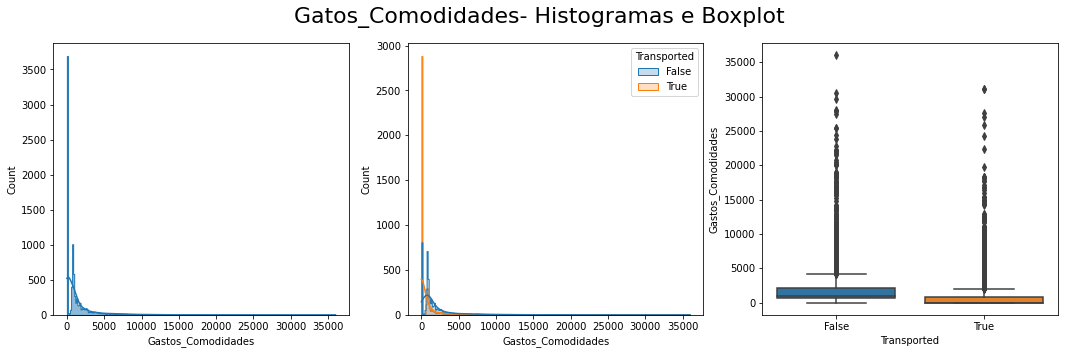

In [ ]:
#Algumas visualizações que me permitem ver a distribuição de frequência da variável, a dispersão dos dados e sua relação com a variável alvo.

fig,ax = plt.subplots(1, 3, figsize=(18,5))
fig.suptitle('Gatos_Comodidades- Histogramas e Boxplot', size=22)

sns.histplot(dados['Gastos_Comodidades'], kde=True, element='step', ax=ax[0])
sns.histplot(x = 'Gastos_Comodidades', hue = 'Transported', data = dados, kde=True, element='step', ax=ax[1])
sns.boxplot(x='Transported', y='Gastos_Comodidades', data=dados,  ax=ax[2])

plt.show()

**Não julguei ser necessário aplicar um teste de normalidade nessa distribuição**

In [ ]:
# Aqui vemos os valores de medidas de tendência central da variável.
# media, mediana, moda

dados['Gastos_Comodidades'].mean(), dados['Gastos_Comodidades'].median(), dados['Gastos_Comodidades'].mode()




(1440.8663292304152, 716.0, 0    0.0
 dtype: float64)

In [ ]:
#Aqui podemos ver as estatísticas de dispersão
#Devio-Padrão - Desvio médio absoluto - variância
dados['Gastos_Comodidades'].std(), dados['Gastos_Comodidades'].mad(), dados['Gastos_Comodidades'].var()

(2803.045693772285, 1592.7290311569877, 7857065.161375352)

In [ ]:
#Para a visualização das medidas separatrizes também
dados['Gastos_Comodidades'].describe()

count     8693.000000
mean      1440.866329
std       2803.045694
min          0.000000
25%          0.000000
50%        716.000000
75%       1441.000000
max      35987.000000
Name: Gastos_Comodidades, dtype: float64

In [ ]:
#REALIZANDO O TESTE DE CORRELAÇÃO PONTO-BISSERAL



#Criando uma cópia do dataset apenas com as duas variáveis
dados_3_pb = dados[['Gastos_Comodidades', 'Transported']].copy()

#Deletando os registros nulos (Pois a ferramenta retorna erro com valores nulos presentes)
dados_3_pb.dropna(inplace= True)

#Criando as variável X e y para realizar o teste
#Convertendo os dados para valores númericos pois a ferramenta não funciona com o tipo bool
X = dados_3_pb.iloc[:,0]
y = dados_3_pb.iloc[:,-1].map({False: 0, True: 1})

alpha = 0.05 #Nível de significância.


from scipy.stats import pointbiserialr # Ferramente que avalia a correlação entre as duas variáveis


Hipotese_nula = 'As variáveis não apresentam correlação.'
Hipotese_alternativa = 'As variáveis apresentam correlação.'


correlation_3, p_value_3 = pointbiserialr(X, y)



if p < alpha:
    print(f'A Hipótese Nula pode ser rejeitada.\n\n{Hipotese_alternativa}')
else:
    print(f'A hipótese nula não pode ser rejeitada. \n\n{Hipotese_nula}')



correlacoes_quantitativas.update({'Gastos_Comodidades': correlation_3})

A Hipótese Nula pode ser rejeitada.

As variáveis apresentam correlação.


In [ ]:
correlacoes_quantitativas

{'Age': -0.07502558362232618, 'Gastos_Comodidades': -0.19951424346781854}

-  ***Aqui podemos observar que há uma correlação negativa entre as variáveis. O que pode explicar o que foi observado no gráfico onde pudemos ver que quem gastou menos teve maior taxa de trasnporte.

Porém, após o término desta sessão vou verificar a hipótese levantada de que a correlação dessa variável estaria mais relacionada a CryoSleep. Criarei uma nova variável boolena que indica se a pessoa gastou ou não e evou utilizar o teste qui-quadrado para levantar a sua correlção com CryoSleep e Transported.***

In [ ]:
dados

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Id_Grupo,Tamanho_Grupo,Side,Deck,Sobrenome,Gastos_Comodidades
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,P,B,Ofracculy,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,S,F,Vines,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,S,A,Susent,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,S,A,Susent,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,S,F,Santantines,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,1,P,A,Noxnuther,8536.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,1,S,G,Mondalley,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,1,S,G,Connon,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,2,S,E,Hontichre,4637.0


**Aqui temos uma matriz de correlação das variáveis quantitativas entre si. Essa função do pandas utiliza a métrica do coeficiente de correlação de Pearson.**

Para saber mais: 

- https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson

- https://medium.com/omixdata/estat%C3%ADstica-an%C3%A1lise-de-correla%C3%A7%C3%A3o-usando-python-e-r-d68611511b5a

In [ ]:
dados[[ 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Gastos_Comodidades']].corr()



,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Gastos_Comodidades
Age,1.000000,0.068785,0.128464,0.032949,0.122865,0.100213,0.186530
RoomService,0.068785,1.000000,-0.015126,0.052337,0.009244,-0.018624,0.234374
FoodCourt,0.128464,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.742608
ShoppingMall,0.032949,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.220529
Spa,0.122865,0.009244,0.221468,0.014542,1.000000,0.147658,0.592656
VRDeck,0.100213,-0.018624,0.224572,-0.007849,0.147658,1.000000,0.585684
Gastos_Comodidades,0.186530,0.234374,0.742608,0.220529,0.592656,0.585684,1.000000


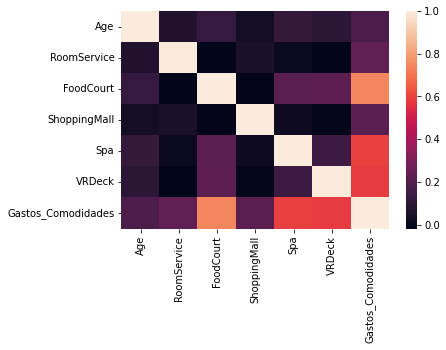

In [ ]:
sns.heatmap(dados[[ 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Gastos_Comodidades']].corr())

###  <font color=BLACK> Correlação ponto Bisseral em RoomService, FoodCourt, ShoppingMall, SPA e VRDeck  X  Transported VRDeck</font>

In [ ]:
quantitativas_gastos = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
#Criando uma lista com o nome separado de cada variável quantitativa de gastos

In [ ]:
#Criando variáveis vazias pra receber os resultados dos testes
correlation_for = _
p_value_for = _


#Realizando o loop com os testes
for teste in range (4):


    #REALIZANDO O TESTE DE CORRELAÇÃO PONTO-BISSERAL



    #Criando uma cópia que receberá cada variável por vez durante o for 
    dados_pb = dados[[quantitativas_gastos[teste], 'Transported']].copy()

    #Deletando os registros nulos (Pois a ferramenta retorna erro com valores nulos presentes)
    dados_pb.dropna(inplace= True)

    #Criando as variável X e y para realizar o teste
    #Convertendo os dados para valores númericos pois a ferramenta não funciona com o tipo bool
    X = dados_pb.iloc[:,0]
    y = dados_pb.iloc[:,-1].map({False: 0, True: 1})

    alpha = 0.05 #Nível de significância.

    Hipotese_nula = 'As variáveis não apresentam correlação.'
    Hipotese_alternativa = 'As variáveis apresentam correlação.'
    
    correlation_for, p_value_for = pointbiserialr(X, y)

    if p_value_for < alpha:
      print (f'Variável {quantitativas_gastos[teste]}:\n\nHipóteste nula rejeitada.\n\n{Hipotese_alternativa}\n')
      print()
      print('***'*15)
    else:
      print (f'Variável {quantitativas_gastos[teste]}:\n\nHipóteste alternativa rejeitada.\n\n{Hipotese_nula}\n')
      print()
      print('***'*15)

    correlacoes_quantitativas.update({quantitativas_gastos[teste]: correlation_for})



#SHOPPINGMALL FOI A ÚNICA VARIÁVEL QUE NÃO APRESENTOU CORRELAÇÃO NO TESTE DO PONTO-BISSERAL

Variável RoomService:

Hipóteste nula rejeitada.

As variáveis apresentam correlação.


*********************************************
Variável FoodCourt:

Hipóteste nula rejeitada.

As variáveis apresentam correlação.


*********************************************
Variável ShoppingMall:

Hipóteste alternativa rejeitada.

As variáveis não apresentam correlação.


*********************************************
Variável Spa:

Hipóteste nula rejeitada.

As variáveis apresentam correlação.


*********************************************


In [ ]:
correlacoes_quantitativas

{'Age': -0.07502558362232618,
 'FoodCourt': 0.045583416643584604,
 'Gastos_Comodidades': -0.19951424346781854,
 'RoomService': -0.241123579902962,
 'ShoppingMall': 0.009391027784015257,
 'Spa': -0.21854462654893375}

##### Matriz de correlação das variáveis quantitativas com Transported

In [ ]:
correlacoes_df_quantitativas = pd.DataFrame(columns =  ['Score - Ponto Bisseral' ])


correlacoes_df_quantitativas['Score - Ponto Bisseral'] =  correlacoes_quantitativas.values()
correlacoes_df_quantitativas['Score - Ponto Bisseral']= correlacoes_df_quantitativas['Score - Ponto Bisseral'].astype('float64')
correlacoes_df_quantitativas.index = ['Age', 'Gastos_Comodidades', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa']
correlacoes_df_quantitativas.sort_values('Score - Ponto Bisseral', inplace=True, ascending=False)


correlacoes_df_quantitativas

,Score - Ponto Bisseral
FoodCourt,0.045583
ShoppingMall,0.009391
Age,-0.075026
Gastos_Comodidades,-0.199514
Spa,-0.218545
RoomService,-0.241124


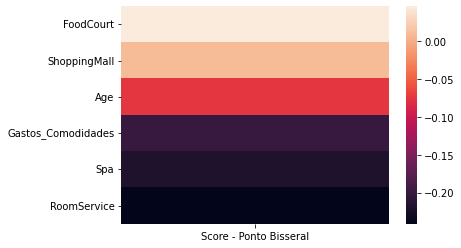

In [ ]:
sns.heatmap(correlacoes_df_quantitativas)

##  <font color=BLACK>Correlação entre gastos e CryoSleep</font>

In [ ]:
def gastou_ou_nao(x):
  return x != 0

#Criando uma função para criar a nova variável que indica se o passageiro gastou ou não durante a viagem

In [ ]:
#Criando a variável

dados['Gastos_Bool'] = dados['Gastos_Comodidades'].map(gastou_ou_nao)

In [ ]:
#Visuaizando os três primeiros registros da variável

dados.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,Id_Grupo,Tamanho_Grupo,Side,Deck,Sobrenome,Gastos_Comodidades,Gastos_Bool
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,0001,1,P,B,Ofracculy,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,0002,1,S,F,Vines,736.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,0003,2,S,A,Susent,10383.0,True


In [ ]:
#DISTRIBUIÇÃO DE FREQUÊNCIA DAS CATEGORIAS

frequencia_cs = dados['Gastos_Bool'].value_counts()
frequencia_cs#Para verificarmos o valor total da frequência das categorias no registro

True     5040
False    3653
Name: Gastos_Bool, dtype: int64

In [ ]:
percentual_cs = dados['Gastos_Bool'].value_counts(normalize = True)*100
percentual_cs#Pra verificarmos a percentual dos registros em relação ao valor total de registros

True     57.977683
False    42.022317
Name: Gastos_Bool, dtype: float64

In [ ]:
#Construindo um DataFrame com as informações de frequência e percentual
dist_freq_cs = pd.DataFrame(
    {'Frequência': frequencia_cs, 'Porcentagem (%)': percentual_cs}
)



dist_freq_cs.sort_index(ascending = True, inplace = True)
dist_freq_cs.reset_index(inplace=True)
dist_freq_cs.rename({'index': 'Classes'}, axis= 'columns', inplace = True)
dist_freq_cs

,Classes,Frequência,Porcentagem (%)
0,False,3653,42.022317
1,True,5040,57.977683


In [ ]:
#AQUI ESTAREMOS VERIFICANDO A RELAÇÃO DESSE VARIÁVEL COM A VARIÁVEL TRANSPORTED, QUE É NOSSO ALVO NO OBJETIVO FINAL DO PROJETO

frequencia_hp_transported = pd.crosstab(
    
    index = dados['Gastos_Bool'],
    columns = dados['CryoSleep'],


)


frequencia_hp_transported

CryoSleep,False,True
Gastos_Bool,,
False,518,3037
True,4921,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


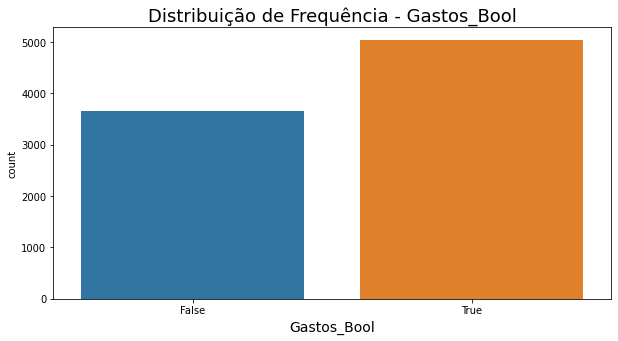

In [ ]:
#Construindo uma visualização da distribuição de frequência das categorias

ax = sns.countplot(dados['Gastos_Bool'])

ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição de Frequência - Gastos_Bool', fontsize = 18)
ax.set_xlabel('Gastos_Bool', fontsize = 14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


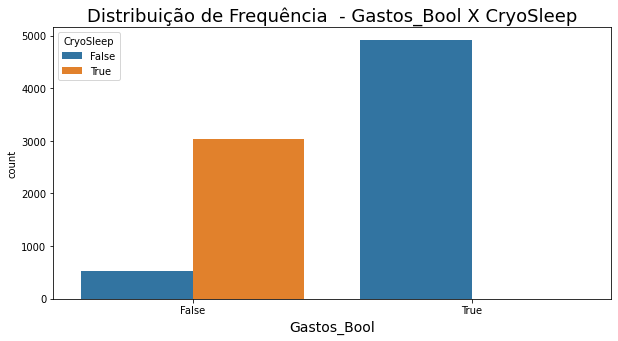

In [ ]:
#AQUI TEMOS UMA VISUALIZAÇÃO DA RELAÇÃO DE ASSOCIAÇÃO ENTRE A VARIÁVEL CRYOSLEEP E A VARIÁVEL ALVO

ax = sns.countplot(dados['Gastos_Bool'], hue = dados['CryoSleep'])

ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição de Frequência  - Gastos_Bool X CryoSleep', fontsize = 18)
ax.set_xlabel('Gastos_Bool', fontsize = 14)
ax

In [ ]:



#Criando uma cópia do dataset apenas com as duas variáveis
dados_gastos = dados[['Gastos_Bool', 'CryoSleep']].copy()
#Deletando os registros nulos (Pois a ferramenta retorna erro com valores nulos presentes)
dados_gastos.dropna(inplace= True)

#Criando as variável X e y para realizar o teste
#Convertendo os dados para valores númericos pois a ferramenta não funciona com o tipo bool
X = dados_2.iloc[:,0].map({False: 0, True: 1})
y = dados_2.iloc[:,-1].map({False: 0, True: 1})

#Convertando o X para array numpy e mudando o shape do container para evitar erros
X = X.values
X = X.reshape(-1,1)

#ferramenta cálcula um valor de score e um p-value
score, p_value = chi2(X,y)

#Realizando o teste de hipótese.


alpha = 0.05#Nível de singnificância / intervalo de confiaça

hipótese_H0 = 'Hipótese alternativa rejeitada. Não há associação entre as duas variáveis. Sendo assim, estatísticamente não podemos inferir uma relação de dependência.'
hipótese_H1 = 'Hipótese nula rejeitada. Há associação entre as duas variáveis. Sendo assim, estatísticamente podemos inferir uma relação de dependência.'

if alpha > p_value:
  print (hipótese_H1)

else:
  print (hipótese_H0)



Hipótese nula rejeitada. Há associação entre as duas variáveis. Sendo assim, estatísticamente podemos inferir uma relação de dependência.


In [ ]:
#Aqui podemos ver que o score de correlação é alto

score


array([1194.55672227])

In [ ]:
#Agora para fins de comparação, vou representar visualmente a correlação da Variável GastosBool e da Variável CryoSleep em sua relação com transported

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


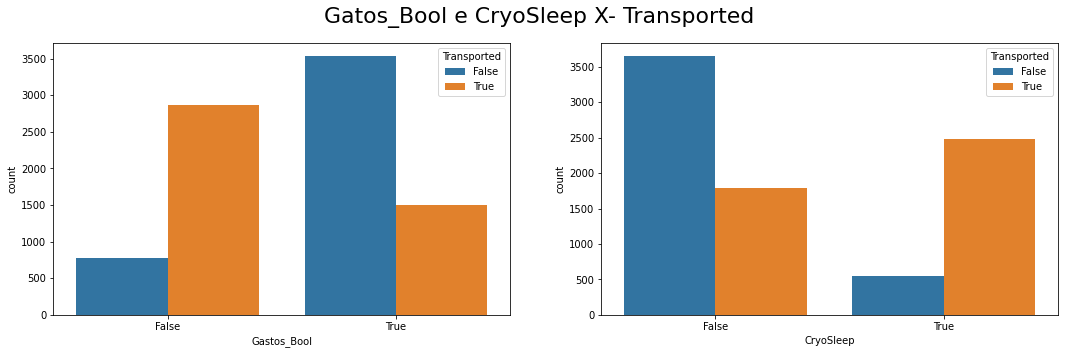

In [ ]:
fig,ax = plt.subplots(1, 2, figsize=(18,5))
fig.suptitle('Gatos_Bool e CryoSleep X- Transported', size=22)

sns.countplot(dados['Gastos_Bool'], hue = dados['Transported'], ax = ax[0])
sns.countplot(dados['CryoSleep'], hue = dados['Transported'], ax = ax[1])

plt.show()

**Aqui, podemos ver que uma maioria da população que gastou na nave não foi transportada, em uma proproção semelhante aos que apresentam False para CryoSleep. Do mesmo modo, para quem não gastou na nave, uma maioria foi transportada, em uma proporção semelhante a quem apresentou True para CryoSleep.**

**Isso dá força para a hipótese que levantei sobre a associação das duas variáveis. Acredito que quem estava disperto naturalmente foi quem gastou mais e vice-versa.**

##  <font color=BLACK>Considerações finais.</font>

1. A variável que apresenta maior correlação estatística com a variável Transported é CryoSleep.

2. As variáveis apresentam correlações entre si. Exemplo Id_Grupo com homeplanet, etc. Isso nos dá ferramentas úteis para poderem ser usadas para tratamentos de dados nulos.

3. Dentre as variáveis quantitativas temos diferentes níveis de correlação.

4. Existem valores duplicados na variável Name.

5. Em testes livres não parecem haver outliers significativos. Temos bastante registros em age que apresentam o valor de 0, mas como a variável foi dada como uma variável quantitativa discreta, partirei do pressuposto que são bebês.

6. A variável Sobrenome apresenta uma cardinalidade muito grande. Isso pode prejudicar a performance de modelos baseados em arvóres de decisão.

7. Nas variáveis quantitativas, não temos distribuições normais. Isso pode prejudicar modelos baysianos como o GaussianNB.

#  <font color=BLACK>4. Tratamento dos dados.</font>

##  <font color=BLACK>Criando no 'dados.test' as variáveis criadas durante o EDA..</font>

In [ ]:
dados_teste['Id_Grupo'] = dados_teste['PassengerId'].str[:4] # Criando uma nova coluna (variável) classificando cada registro pelo número de ID do seu grupo

In [ ]:
# Criando a coluna Side com a ultima str do atributo 'Cabin'
dados_teste['Side'] = dados_teste['Cabin'].str.get(-1)


In [ ]:
#Criando a coluna Deck com a primeira str do atributo 'Cabin'
dados_teste['Deck'] = dados_teste['Cabin'].str.get(0)

In [ ]:
dados_nome_2_teste = dados_teste['Name'].str.split(' ', expand = True)
#A partir da variável Name eu crio um novo dataframe com duas colunas, uma para nome e uma para sobrenome.




dados_teste['Sobrenome'] = dados_nome_2_teste.iloc[:, -1]
#Aqui eu crio a variável sobrenome no dataframe do projeto com a coluna de sobrenome do DataFrame criando.



In [ ]:
#Aqui vou estar preenchendo os registros nulos das variáveis que vou usar para criar a nova, pois, ao deixar implicará na recorrência de muitos registros nulos na nova variável

for c in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
  dados_teste[c].fillna(dados_teste[c].median(), inplace = True)



In [ ]:
dados_teste['Gastos_Comodidades'] = dados['RoomService'] + dados['FoodCourt'] + dados['ShoppingMall'] + dados['Spa'] + dados['VRDeck']


In [ ]:
#Criando a variável

dados_teste['Gastos_Bool'] = dados_teste['Gastos_Comodidades'].map(gastou_ou_nao)

In [ ]:
dados_teste_['Tamanho_Grupo'] = dados['Id_Grupo'].map(dict(dados['Id_Grupo'].value_counts()))

##  <font color=BLACK>Dados Nulos.</font>

**Abaixo verificamos uma relação da soma de registros nulos por variável(Nos dados de treino e teste. Dado o tamanho do DataSet, esses valores não representam proporções muito grandes, então não serão tomados esforços desproporcionais para o tratamento de registros nulos. Vamos usar o seguinte planejamento:**

1. Preencheremos as variáveis quantitativas com a mediana, e as qualitativas com a moda.


OBS: Poderia ser despendido um mair esforço no preenchimento dos dados nulos. Porém, verificando as discussões do fórum da competição, as estratégias cabíveis tem um grande custo de tempo e não implicam um ganho de performance significativo na acúracia dos modelos.




In [ ]:
#DADOS DE TREINO

dados.isna().sum()

#Visualizando uma series com os valores de registro nulo para cada variável.


PassengerId             0
HomePlanet            201
CryoSleep             217
Cabin                 199
Destination           182
Age                   179
VIP                   203
RoomService             0
FoodCourt               0
ShoppingMall            0
Spa                     0
VRDeck                  0
Name                  200
Transported             0
Id_Grupo                0
Tamanho_Grupo           0
Side                  199
Deck                  199
Sobrenome             200
Gastos_Comodidades      0
Gastos_Bool             0
dtype: int64

In [ ]:
dados.shape

(8693, 21)

In [ ]:
#DADOS DE TESTE

dados_teste.isnull().sum()

PassengerId             0
HomePlanet             87
CryoSleep              93
Cabin                 100
Destination            92
Age                    91
VIP                    93
RoomService             0
FoodCourt               0
ShoppingMall            0
Spa                     0
VRDeck                  0
Name                   94
Id_Grupo                0
Side                  100
Deck                  100
Sobrenome              94
Gastos_Comodidades      0
Gastos_Bool             0
dtype: int64

In [ ]:
dados_teste.shape

(4277, 19)

In [ ]:
#PREENCHENDO OS VALORES NULOS DOS DATASETS DE TREINO E TESTE


labels = dados_teste.columns
for col in labels:
    if col in ['Age', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
        dados[col].fillna(dados[col].median(), inplace=True)
        dados_teste[col].fillna(dados_teste[col].median(), inplace=True)
    else:
        dados[col].fillna(dados[col].mode()[0], inplace=True)
        dados_teste[col].fillna(dados_teste[col].mode()[0], inplace=True)



In [ ]:
dados.isnull().sum().sum(), dados_teste.isnull().sum().sum()

(0, 0)

##  <font color=BLACK>Tratamento dos dados.</font>

Primeiro estaremos criando uma cópia dos dados de treinamento e teste para que possamos fazer modificação nos registros sem comprometer a integridade dos DataSets originais.

Sobre os procedimentos que serão utilizados:

- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [ ]:
dados_treino, dados_teste_ = dados.copy(), dados_teste.copy()
dados_treino

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,Id_Grupo,Tamanho_Grupo,Side,Deck,Sobrenome,Gastos_Comodidades,Gastos_Bool
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,0001,1,P,B,Ofracculy,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,0002,1,S,F,Vines,736.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,0003,2,S,A,Susent,10383.0,True
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,0003,2,S,A,Susent,5176.0,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,0004,1,S,F,Santantines,1091.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,74.0,Gravior Noxnuther,False,9276,1,P,A,Noxnuther,8536.0,True
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,0.0,Kurta Mondalley,False,9278,1,S,G,Mondalley,0.0,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,0.0,Fayey Connon,True,9279,1,S,G,Connon,1873.0,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,3235.0,Celeon Hontichre,False,9280,2,S,E,Hontichre,4637.0,True


In [ ]:
dados_treino['Id_Grupo'], dados_teste_['Id_Grupo'] = dados_treino['Id_Grupo'].astype('int64'), dados_teste_['Id_Grupo'].astype('int64')

###  <font color=BLACK>Usando o LabelEncoder para converter as variáveis qualitativas para valores númericos.</font>

In [ ]:
labels = ['HomePlanet', 'Destination', 'Side', 'Deck', 'CryoSleep', 'VIP', 'Gastos_Bool']

In [ ]:

for col in labels:
    #Usando um IF para o encoder operar apenas nas variáveis categóricas.
    if dados_treino[col].dtype == 'O':
        encoder = LabelEncoder()
        dados_treino[col] = encoder.fit_transform(dados_treino[col])
        dados_teste_[col] = encoder.transform(dados_teste_[col])
    #Aqui converteremos as variáveis booleanas para números inteiros, sendo Flase: 0 &  
    elif dados_treino[col].dtype == 'bool':
        dados_treino[col] = dados_treino[col].astype('int')
        dados_teste_[col] = dados_teste_[col].astype('int')

###  <font color=BLACK>Usando o MinMaxScaler para colocar em scala os dados das variáveis relacionadas a idade e gastos.</font>


Obs: O objetivo é fazer com que a distribuição de frequência dessas variáveis se adequem a uma distribuição nbormal.

In [ ]:
encoder = LabelEncoder()

labels_scala = ['Age', 'Gastos_Comodidades', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa','VRDeck'	]
scaler = MinMaxScaler()
dados_treino[labels_scala] = scaler.fit_transform(dados_treino[labels_scala])
dados_teste_[labels_scala] = scaler.fit_transform(dados_teste_[labels_scala])

In [ ]:
dados_treino.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,Id_Grupo,Tamanho_Grupo,Side,Deck,Sobrenome,Gastos_Comodidades,Gastos_Bool
0,0001_01,1,0,B/0/P,2,0.493671,0,0.000000,0.000000,0.000000,...,0.000000,Maham Ofracculy,False,1,1,0,1,Ofracculy,0.000000,0
1,0002_01,0,0,F/0/S,2,0.303797,0,0.007608,0.000302,0.001064,...,0.001823,Juanna Vines,True,2,1,1,5,Vines,0.020452,1
2,0003_01,1,0,A/0/S,2,0.734177,1,0.003001,0.119948,0.000000,...,0.002030,Altark Susent,False,3,2,1,0,Susent,0.288521,1


In [ ]:
dados_teste_.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Id_Grupo,Side,Deck,Sobrenome,Gastos_Comodidades,Gastos_Bool
0,0013_01,0,1,G/3/S,2,0.341772,0,0.0,0.000000,0.0,0.00000,0.0,Nelly Carsoning,13,1,6,Carsoning,0.000000,0
1,0018_01,0,0,F/4/S,2,0.240506,0,0.0,0.000356,0.0,0.14226,0.0,Lerome Peckers,18,1,5,Peckers,0.023684,1
2,0019_01,1,1,C/0/S,0,0.392405,0,0.0,0.000000,0.0,0.00000,0.0,Sabih Unhearfus,19,1,2,Unhearfus,0.334116,1


#  <font color=BLACK>5. Criando o modelo.</font>

**O processero ocorrerá da seguinte forma:**


***


1. Será criando um container para receber a acurácia dos modelos

2. Faremos um for com 30 repetições variando o random state dos modelos.

3. Usaremos a média de acurácia das 30 repetições para escolher o "melhor modelo".

4. Usaremos variação cruzada.

5. Usaremos o GridSearchCV para ajustar os hiperparâmetros do modelo escolhido.

6. Os modelos utilizados nesse exemplo serão os:

- RandomForestClassifier;
- GaussianNB;
- LogisticRegression;
- DecisionTreeClassifier;
- XGBClassifier;
- LGBMClassifier;

***

**Os modelos foram escolhidos com base no meu conhecimento introdutório e nas discussões da comunidade no fórum da competição.**


## <font color=black>Definindo X e y e divisão da base de dados em treino e validação.</font>

In [ ]:
X = dados_treino[[ 'CryoSleep', 'Age', 'Side', 'Deck', 'Gastos_Bool', 'HomePlanet', 'Destination', 'RoomService',	'FoodCourt','ShoppingMall','Spa','VRDeck', 'Gastos_Comodidades', 'VIP', 'Id_Grupo', 'Tamanho_Grupo' ]].values
y = dados_treino['Transported']

In [ ]:

X_treino, X_val, y_treino, y_val = train_test_split(X,y, test_size = 0.3, random_state = 42, shuffle=True)



## <font color=BLACK>Criando os containers que receberão as acúracias.</font>

In [ ]:
#Os containers receberão os valores de accuracy para cada um dos testes.


resultados_naive_bayes = []
resultados_logistica = []
resultados_random_forest = []
resultados_decision_tree = []
resultados_XGB = []
resultados_LGBM = []

## <font color=BLACK>Testando os modelos com validação cruzada.</font>

In [ ]:
#Criando um for com 30 repetições onde foi dividido exautivamente o modelo e armaazenado as médias nos containers.
for i in range (30):

    kfold = KFold(n_splits=10, shuffle = True, random_state=i)

    
    modelo_NB = GaussianNB()
    scores = cross_val_score(modelo_NB, X, y, cv = kfold)
    resultados_naive_bayes.append(scores.mean())
  
    modelo_LR = LogisticRegression()
    scores = cross_val_score(modelo_LR, X, y, cv = kfold)
    resultados_logistica.append(scores.mean())
    
    modelo_RF = RandomForestClassifier()
    scores = cross_val_score(modelo_RF, X, y, cv = kfold)
    resultados_random_forest.append(scores.mean())

    modelo_DT = DecisionTreeClassifier()
    scores = cross_val_score(modelo_DT, X, y, cv = kfold)
    resultados_decision_tree.append(scores.mean())

    modelo_XGB = XGBClassifier()
    scores = cross_val_score(modelo_XGB, X, y, cv = kfold)
    resultados_XGB.append(scores.mean())

    modelo_LGBM = LGBMClassifier()
    scores = cross_val_score(modelo_LGBM, X, y, cv = kfold)
    resultados_LGBM.append(scores.mean())


In [ ]:
#CRIANDO UM DATAFRAME QUE RECEBE A MÉDIA DE ACÚRACIA DOS MODELOS.

modelos = pd.DataFrame({'Naïve_Bayes': resultados_naive_bayes, 'Regressão_Logística': resultados_logistica, 'Random_Forest': resultados_random_forest, 'Decision_Tree': resultados_decision_tree, 'XGBClassifier': resultados_XGB, 'LGBMClassifier': resultados_LGBM})


In [ ]:
modelos

,Naïve_Bayes,Regressão_Logística,Random_Forest,Decision_Tree,XGBClassifier,LGBMClassifier
0,0.740483,0.733006,0.799378,0.748878,0.800532,0.813759
1,0.740827,0.734038,0.795696,0.748764,0.800525,0.810076
2,0.740134,0.732542,0.799840,0.748072,0.798571,0.808120
3,0.741058,0.733236,0.799262,0.747036,0.800299,0.809733
4,0.740596,0.736226,0.795811,0.740482,0.799491,0.809385
5,0.740599,0.734387,0.799150,0.750146,0.800302,0.810079
6,0.740253,0.735423,0.796963,0.750946,0.800185,0.810076
7,0.741054,0.733806,0.796501,0.745082,0.799838,0.807776
8,0.740475,0.734380,0.796847,0.751064,0.798686,0.808810
9,0.740481,0.736798,0.798804,0.750028,0.799841,0.810882


In [ ]:
#Aqui temos acesso as estatísticas descritivas das acurácias dos modelos

modelos.describe()

,Naïve_Bayes,Regressão_Logística,Random_Forest,Decision_Tree,XGBClassifier,LGBMClassifier
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.740530,0.734767,0.797592,0.746642,0.799712,0.810100
std,0.000324,0.001174,0.001286,0.004055,0.000940,0.001670
min,0.739903,0.732542,0.795466,0.735532,0.797076,0.806052
25%,0.740367,0.734148,0.796588,0.744161,0.799063,0.809125
50%,0.740482,0.734671,0.797420,0.747153,0.799896,0.810077
75%,0.740682,0.735534,0.798746,0.748850,0.800390,0.810768
max,0.741165,0.736915,0.799840,0.755204,0.800872,0.813759


In [ ]:
#Aqui temos as médias em ordem crescente.

modelos.mean().sort_values()

Regressão_Logística    0.734767
Naïve_Bayes            0.740530
Decision_Tree          0.746642
Random_Forest          0.797592
XGBClassifier          0.799712
LGBMClassifier         0.810100
dtype: float64

**Como vamos usar uma métrica simples pra escolha do modelo principal, que no caso é a media de acúracia, nosso escolhido será o LGBMClassifier.**  

## <font color=BLACK>Treinando o modelo e ajustando os parâmetros.</font>

In [ ]:
#Dicionário com os parâmetros para o gscv

parametros_lgbm = {
    'learning_rate':[0.1, 0.085, 0.05, 0.02],
    'n_estimators':[110,100,90],
    'min_child_samples': [25, 30, 40, 50],
    'num_leaves': [31, 34, 37, 40, 43]
}



In [ ]:
#Treinando os modelo escolhido
modelo_lgbm = gscv(LGBMClassifier(random_state=42, max_depth=8, subsample=0.6), parametros_lgbm)
modelo_lgbm.fit(X_treino, y_treino)
previsoes = modelo_lgbm.predict(X_val)
accuracy_lgbm = accuracy_score(y_val, previsoes)


In [ ]:
print(f'Com os dados de treino nosso modelo teve uma precisão de {accuracy_lgbm*100:.2f}%.')

Com os dados de treino nosso modelo teve uma precisão de 80.60%


## <font color=BLACK>Fazendo a classificação no dados de teste para submissão.</font>

In [ ]:
X_teste = dados_teste_[[ 'CryoSleep', 'Age', 'Side', 'Deck', 'Gastos_Bool', 'HomePlanet', 'Destination', 'RoomService',	'FoodCourt','ShoppingMall','Spa','VRDeck', 'Gastos_Comodidades', 'Id_Grupo', 'VIP', 'Tamanho_Grupo']]
#Criando o X para que nosso modelo possa fazer a predição para o envio da submissão.

In [ ]:
previsoes_teste = modelo_lgbm.predict(X_teste)

array([ True, False,  True, ...,  True,  True, False])

In [ ]:
#Gerando o DataFrame nos moldes de SampleSubmissions.
submissao = pd.DataFrame({'PassengerId': dados_teste_['PassengerId'], 'Transported': previsoes_teste})

In [ ]:
submissao

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
#GErando o arquivo CSV para submissão no site
submissao.to_csv('submissao_1.csv', index = False)

# <font color=BLACK>6. Resultado na leaderbord do Kaggle.</font>

<div class="sc-gauFBm bUlBWq"><div class="sc-eCDnqH ezJCbZ">🥳</div><div class="sc-jUtGcO ctizIY"><span class="sc-kLLXSd sc-ikZpkk jtmWnw gJVCJh">Your Best Entry!</span><span class="sc-kLLXSd sc-ikZpkk jtmWnw gJVCJh">Your most recent submission scored 0.74093, which is an improvement of your previous score of 0.73462. Great job!</span></div><div class="sc-keNpes dKLeNx"><a href="https://twitter.com/intent/tweet?text=Rank%201978%20on%20%23kaggle.%20I'll%20sleep%20when%20I'm%20dead.%20https%3A%2F%2Fkaggle.com%2Fcompetitions%2Fspaceship-titanic" tabindex="0" class="sc-hjriPb fROQMb"><button class="sc-gUAEMC juXxlY" tabindex="-1" role="button"><span class="sc-gXmSlM sc-cCsOjp cKhlzA piYDj">Tweet this</span></button></a></div></div>

**O Modelo obteve 74% de taxa de acerto na classificação dos dados de teste.**


***


**Sendo assim o objetivo de superar a acurácia de 49% da linha de base foi alcançado.**

# <font color=BLACK>7. Pontos que podem ser aprimorados.</font>

1. Feature selection para evitar overfit.
2. Melhores técnicas para ajuste dos hiperparâmetros e comparação dos modelos.
3. Técnicas mais complexas para o tratamento de registros nulos.
4. Ajuste a boas práticas de visualização de dados.
5. Revisão dos códigos e linha de raciocínio.
6. clean code.
***

No mais, espero ter colaborado no resgate dos passageiros perdidos e na dura jornada de colonização espacial rumo a perpetuação da espécie. 🪐

***